In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")

##Importing the data Importing the data

In [2]:
df= pd.read_excel('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _Smita/Capstone Codework/aariv _capstone /New/label encoding /Aariv _Final Capstone -2/Laptop_File_Smita_Capstone Project Note_2/Social Media Data for DSBA (3).xlsx')

##View Top 5 Records of Dataset

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


##Checking For Duplicates Values in data 

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(11760, 17)

##View bottom 5 Records of Dataset

In [6]:
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


## Removal of Unwanted Column "UserUID" from data 

In [7]:
df.drop(['UserID'],axis=1,inplace=True)

##Shape of data

In [8]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  11760 
no. of columns:  16


##Data Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [10]:
# Making different list for categorical columns and numerical columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Taken_product', 'preferred_device', 'yearly_avg_Outstation_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


## Summary statistics of Dataset

In [11]:
# Describe for numerical and categorical columns¶
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.830844,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.481765,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790029,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.793878,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0


In [12]:
df[cat].describe().T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


## Proportion of Target variable in data 

In [13]:
df.Taken_product.value_counts()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

##Data type of data 

In [14]:
df.dtypes

Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

In [15]:
df.dtypes.value_counts()

object     7
int64      6
float64    3
dtype: int64

##Checking for Missing Values in data 

In [16]:
df.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [17]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

Yearly_avg_view_on_travel_page             581
preferred_device                            53
total_likes_on_outstation_checkin_given    381
yearly_avg_Outstation_checkins              75
preferred_location_type                     31
Yearly_avg_comment_on_travel_page          206
following_company_page                     103
dtype: int64

In [18]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Yearly_avg_view_on_travel_page             float64
preferred_device                            object
total_likes_on_outstation_checkin_given    float64
yearly_avg_Outstation_checkins              object
preferred_location_type                     object
Yearly_avg_comment_on_travel_page          float64
following_company_page                      object
dtype: object

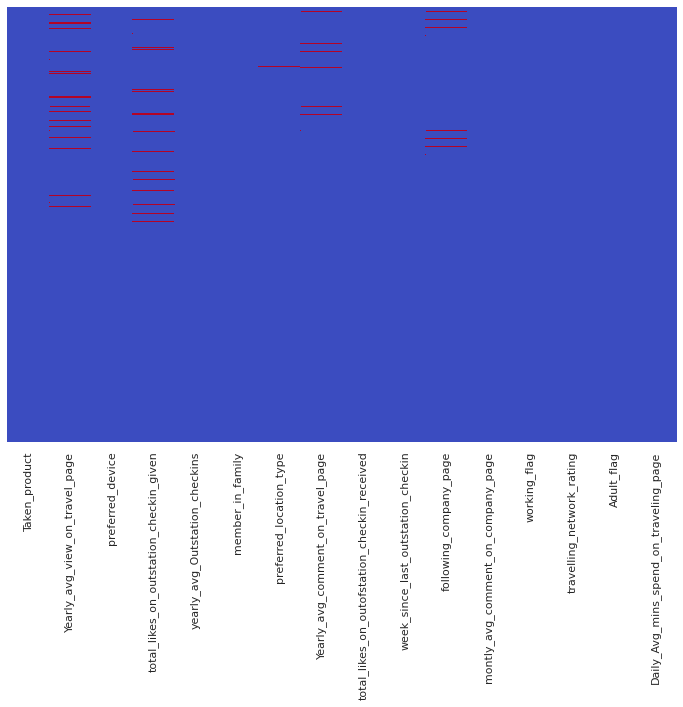

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

##Null Values Imputation

In [20]:
df.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [21]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Taken_product', 'preferred_device', 'yearly_avg_Outstation_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


##Impute the Non-Object values using Median

In [22]:
median1=df["Yearly_avg_view_on_travel_page"].median()
median2=df["total_likes_on_outstation_checkin_given"].median()
median3=df["Yearly_avg_comment_on_travel_page"].median()



df["Yearly_avg_view_on_travel_page"].replace(np.nan,median1,inplace=True)
df["total_likes_on_outstation_checkin_given"].replace(np.nan,median2,inplace=True)
df["Yearly_avg_comment_on_travel_page"].replace(np.nan,median3,inplace=True)


##Impute the Object values using Mode

In [23]:
mode1=df["preferred_device"].mode().values[0]
mode2=df["yearly_avg_Outstation_checkins"].mode().values[0]
mode3=df["preferred_location_type"].mode().values[0]
mode4=df["following_company_page"].mode().values[0]


df["preferred_device"]=df["preferred_device"].replace(np.nan,mode1)
df["yearly_avg_Outstation_checkins"]= df["yearly_avg_Outstation_checkins"].replace(np.nan,mode2)
df["preferred_location_type"]=df["preferred_location_type"].replace(np.nan,mode3)
df["following_company_page"]=df["following_company_page"].replace(np.nan,mode4)

## Confirmation that there is No null values in data after Imputation

In [24]:
df.isnull().sum()


Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

Data -Preprocessing / Treat the Bad Data

##Uniques values in variables and correction of data

In [25]:
df.member_in_family.unique()

array([2, 1, 4, 'Three', 3, 5, 10], dtype=object)

In [26]:
df['member_in_family'].value_counts()

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [27]:
df['member_in_family'].replace(to_replace='Three',value=np.NAN,inplace =True)

In [28]:
df['member_in_family'].value_counts()

3.0     4561
4.0     3184
2.0     2256
1.0     1349
5.0      384
10.0      11
Name: member_in_family, dtype: int64

In [29]:
df['member_in_family'].isnull().sum()

15

In [30]:
df['member_in_family'].mode().values[0]

3.0

In [31]:
df['member_in_family'].fillna(df['member_in_family'].mode().values[0],inplace=True)

In [32]:
df['member_in_family'].value_counts()

3.0     4576
4.0     3184
2.0     2256
1.0     1349
5.0      384
10.0      11
Name: member_in_family, dtype: int64

##BAD Data Treatment'*'

In [33]:
df.yearly_avg_Outstation_checkins .unique()

array([1, 24, 23, 27, 16, 15, 26, 19, 21, 11, 10, 25, 12, 18, 29, 22, 14,
       20, 28, 17, 13, '*', 5, 8, 2, 3, 9, 7, 6, 4], dtype=object)

In [34]:
df.replace('*',1,inplace=True)

In [35]:
df.yearly_avg_Outstation_checkins .unique()

array([ 1, 24, 23, 27, 16, 15, 26, 19, 21, 11, 10, 25, 12, 18, 29, 22, 14,
       20, 28, 17, 13,  5,  8,  2,  3,  9,  7,  6,  4])

In [36]:
df[df['yearly_avg_Outstation_checkins']=='*']['yearly_avg_Outstation_checkins'].nunique()

0

In [37]:
df['yearly_avg_Outstation_checkins']=df['yearly_avg_Outstation_checkins'].astype('float64')

In [38]:
df.dtypes

Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                  float64
member_in_family                                float64
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

## Separate the Preferred Device Into mobiles and Laptops

In [39]:
df.preferred_device.unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Tab', 'Android',
       'Android OS', 'Other', 'Others', 'Laptop', 'Mobile'], dtype=object)

In [40]:
df['preferred_device'] = np.where(df['preferred_device'] == 'Laptop','Laptop','Mobile')

In [41]:
df['preferred_device']=np.where(df['preferred_device'] =='Mobile','1', df['preferred_device'])
df['preferred_device']=np.where(df['preferred_device'] =='Laptop','0', df['preferred_device'])

In [42]:
df['preferred_device']=df['preferred_device'].astype('float64')

In [43]:
df['preferred_device'].value_counts(normalize=True)

1.0    0.905782
0.0    0.094218
Name: preferred_device, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

## Clubbing all levels into Yes and No category 

In [45]:
df['following_company_page'].value_counts()

No     8458
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

In [46]:
df['following_company_page'].replace(to_replace=[1,0],value=np.NAN,inplace =True)

In [47]:
df['following_company_page'].value_counts()

No     8458
Yes    3285
Name: following_company_page, dtype: int64

In [48]:
df['following_company_page'].isnull().sum()

17

In [49]:
df['following_company_page'].mode().values[0]

'No'

In [50]:
df['following_company_page'].fillna(df['following_company_page'].mode().values[0],inplace=True)

In [51]:
df['following_company_page'].value_counts()

No     8475
Yes    3285
Name: following_company_page, dtype: int64

## Coverted 2,3 as nan and then replaced by median 

In [52]:
df['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [53]:
df['Adult_flag'].replace(to_replace=[2,3],value=np.NAN,inplace =True)

In [54]:
df['Adult_flag'].value_counts()

0.0    5048
1.0    4768
Name: Adult_flag, dtype: int64

In [55]:
df['Adult_flag'].isnull().sum()

1944

In [56]:
df['Adult_flag'].median()

0.0

In [57]:
df['Adult_flag'].median()

0.0

In [58]:
# df['Adult_flag'].fillna(df[df['Adult_flag']].median(),inplace=True)
df['Adult_flag'].fillna(df['Adult_flag'].median(),inplace=True)

In [59]:
df['Adult_flag'].value_counts()

0.0    6992
1.0    4768
Name: Adult_flag, dtype: int64

## Unique values for categorical variables

In [60]:
for column in df.columns:
    if df[column].dtype =='object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TAKEN_PRODUCT :  2
Yes    1896
No     9864
Name: Taken_product, dtype: int64


PREFERRED_LOCATION_TYPE :  15
Movie                 5
OTT                   7
Game                 12
Tour and Travel      47
Tour  Travel         60
Hill Stations       108
Entertainment       516
Trekking            528
Social media        633
Big Cities          636
Other               643
Medical            1845
Historical site    1856
Financial          2409
Beach              2455
Name: preferred_location_type, dtype: int64


FOLLOWING_COMPANY_PAGE :  2
Yes    3285
No     8475
Name: following_company_page, dtype: int64


WORKING_FLAG :  2
Yes    1808
No     9952
Name: working_flag, dtype: int64




In [61]:
df.preferred_location_type.value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [62]:
df.preferred_location_type.unique()

array(['Financial', 'Other', 'Medical', 'Beach', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],
      dtype=object)

##Corrections In Tour and Travel 

In [63]:

df['preferred_location_type'] = df['preferred_location_type'].str.replace('Tour and Travel','TourTravel')

In [64]:

df['preferred_location_type'] = df['preferred_location_type'].str.replace('Tour  Travel','TourTravel')

In [65]:
df.preferred_location_type.value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
TourTravel          107
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [66]:
df.preferred_device.unique()

array([1., 0.])

In [67]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Taken_product
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: preferred_location_type
['Financial', 'Other', 'Medical', 'Beach', 'Game', ..., 'OTT', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 14
Categories (14, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Other',
                          'Social media', 'TourTravel', 'Trekking']
[ 3 10  7  0  4 11  2 12  8  9  6  1 13  5]


feature: following_company_page
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: working_flag
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [68]:
# unique values for categorical variables
for column in df.columns:
    if df[column].dtype =='object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

No bad data observed in below variables

In [69]:
df.yearly_avg_Outstation_checkins.unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,  9.,
        7.,  6.,  4.])

In [70]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [71]:
# df1 = df.dropna()

In [72]:
df.Yearly_avg_view_on_travel_page.unique()

array([307., 367., 277., 247., 202., 240., 271., 225., 285., 270., 262.,
       217., 232., 255., 210., 165., 397., 180., 157., 330., 345., 292.,
       322., 375., 195., 360., 412., 382., 300., 405., 435., 150., 187.,
        42., 427., 352.,  35., 450., 135., 308., 368., 249., 205., 445.,
       226., 287., 263., 219., 234., 256., 212., 241., 399., 286., 182.,
       159., 316., 332., 347., 248., 331., 294., 323., 376., 265., 204.,
       309., 257., 346., 264., 361., 196., 278., 444., 272., 414., 339.,
       443., 233., 280., 422., 174., 384., 302., 242., 181., 211., 436.,
       279., 151., 377., 188., 189., 166., 406., 324., 197., 143., 167.,
       383., 227., 144., 301., 429., 203., 250., 413., 338., 310., 392.,
       317., 354., 400., 369., 137., 136., 295., 391., 353., 218., 362.,
       428., 451., 430., 173., 190., 398., 355., 437., 407., 152., 421.,
       158., 293., 235., 220., 340., 385., 370., 325., 415., 452., 315.,
       379., 290., 231., 281., 269., 222., 244., 22

In [73]:
df.total_likes_on_outstation_checkin_given.unique()

array([38570.,  9765., 48055., ...,  5478., 35851., 22025.])

In [74]:
df.Yearly_avg_comment_on_travel_page.unique()

array([ 94.,  61.,  92.,  56.,  40.,  79.,  81.,  67.,  44.,  84.,  49.,
        31.,  93.,  50.,  51.,  80.,  96.,  78.,  45.,  82.,  53.,  83.,
        58.,  72.,  48.,  42.,  41.,  86.,  97.,  75.,  33.,  37.,  73.,
        98.,  47.,  71.,   3.,  43.,  99.,  59.,  95.,  57.,  76.,  87.,
        66.,  55.,  32.,  52.,  70.,  62.,  64.,  63.,  60., 100.,  46.,
        39.,  77.,  91.,  54.,  34.,  90.,  65.,  36.,  88.,  35.,  89.,
        68.,  85.,  69.,  74.,  38., 106., 105., 103., 108., 111., 104.,
       102., 109., 110., 112., 101., 107., 615., 114., 113., 215., 815.,
       685., 118., 117., 115., 116., 121., 122., 120., 124., 119., 125.,
       123.])

In [75]:
df.total_likes_on_outofstation_checkin_received.unique()

array([ 5993,  5130,  2090, ..., 12093,  9983,  6203])

In [76]:
 df.week_since_last_outstation_checkin.unique()

array([ 8,  1,  6,  9,  0,  4,  5,  2,  7,  3, 10, 11])

In [77]:
 df.montly_avg_comment_on_company_page.unique() 

array([ 11,  23,  15,  12,  13,  20,  22,  21,  17,  14,  16,  18,  19,
        24,  25,  30,  29,  28,  27, 376, 381,  26, 427, 437, 499, 363,
       425, 439, 301, 461, 322, 324, 355, 338, 332, 459, 460, 453, 300,
       474, 368, 352, 445, 310, 323, 490, 371, 444, 343, 417, 393, 463,
       350, 432, 412, 379, 336, 441, 346, 317, 406, 485, 400, 483, 478,
       438, 354, 313, 497, 325, 419, 388, 398, 378, 397, 349, 356, 420,
       347, 500, 442, 435, 447, 484, 330, 326, 360, 403, 465, 365, 353,
       429, 345, 321, 491, 476, 475, 487, 316, 428, 472, 314, 405, 473,
       339, 342, 455, 469, 399, 422, 370, 361, 467, 458, 304, 410, 383,
       466, 446, 302, 486, 333, 418, 351, 391, 468, 454, 329, 390, 384,
       404, 402, 424, 488, 440, 312, 449, 477, 380, 357, 414, 337,  33,
        32,  31,  34,  35,  36,  37,  40,  38,  41,  39,  43,  42,  45,
        44,  47,  46,  48])

In [78]:
df.travelling_network_rating.unique() 

array([1, 4, 2, 3])

In [79]:
df.Daily_Avg_mins_spend_on_traveling_page.unique()

array([  8,  10,   7,   6,  12,   1,  17,   5,   3,  31,  13,   0,  26,
        24,  22,   9,  19,   2,  23,  14,  15,   4,  29,  28,  21,  25,
        20,  11,  16,  37,  38,  30,  40,  18,  36,  34,  32,  33,  35,
        27,  41, 135,  45,  43,  39,  44,  42, 170, 235, 270,  47,  46])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  int8   
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  float64
 6   preferred_location_type                       11760 non-null  int8   
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

## Data Visualization /Univariate Analaysis

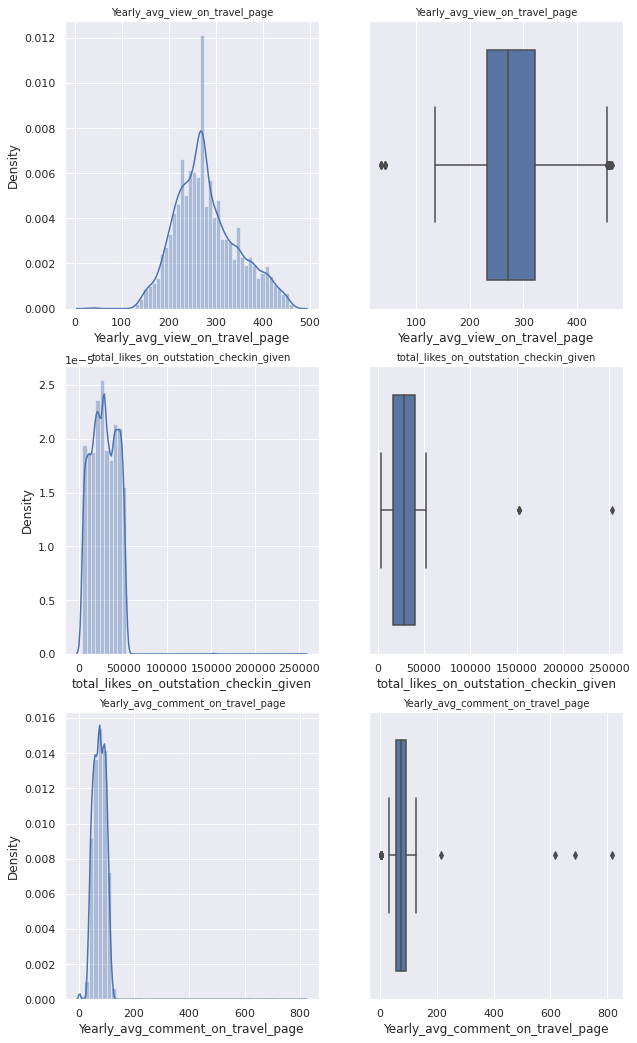

In [81]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['Yearly_avg_view_on_travel_page'],ax=axes[0][0])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)

a = sns.boxplot(df['Yearly_avg_view_on_travel_page'] ,orient ="v",ax=axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=10)


a = sns.distplot(df['total_likes_on_outstation_checkin_given'], ax=axes[1][0])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)

a = sns.boxplot(df['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("total_likes_on_outstation_checkin_given",fontsize=10)

a = sns.distplot(df['Yearly_avg_comment_on_travel_page'] , ax=axes[2][0])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)

a = sns.boxplot(df['Yearly_avg_comment_on_travel_page'] , orient = "v" , ax=axes[2][1])
a.set_title("Yearly_avg_comment_on_travel_page",fontsize=10)


plt.show()

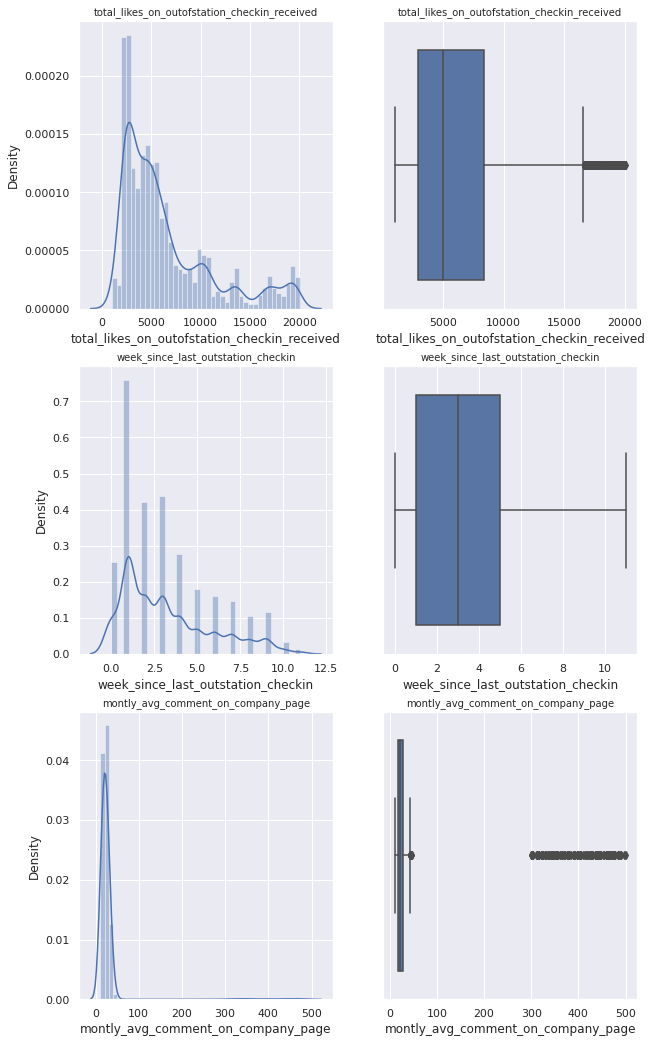

In [82]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['total_likes_on_outofstation_checkin_received'],ax=axes[0][0])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)

a = sns.boxplot(df['total_likes_on_outofstation_checkin_received'] ,orient ="v",ax=axes[0][1])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=10)



a = sns.distplot(df['week_since_last_outstation_checkin'], ax=axes[1][0])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.boxplot(df['week_since_last_outstation_checkin'] , orient = "v" , ax=axes[1][1])
a.set_title("week_since_last_outstation_checkin",fontsize=10)

a = sns.distplot(df['montly_avg_comment_on_company_page'] , ax=axes[2][0])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)

a = sns.boxplot(df['montly_avg_comment_on_company_page'] , orient = "v" , ax=axes[2][1])
a.set_title("montly_avg_comment_on_company_page",fontsize=10)


plt.show()

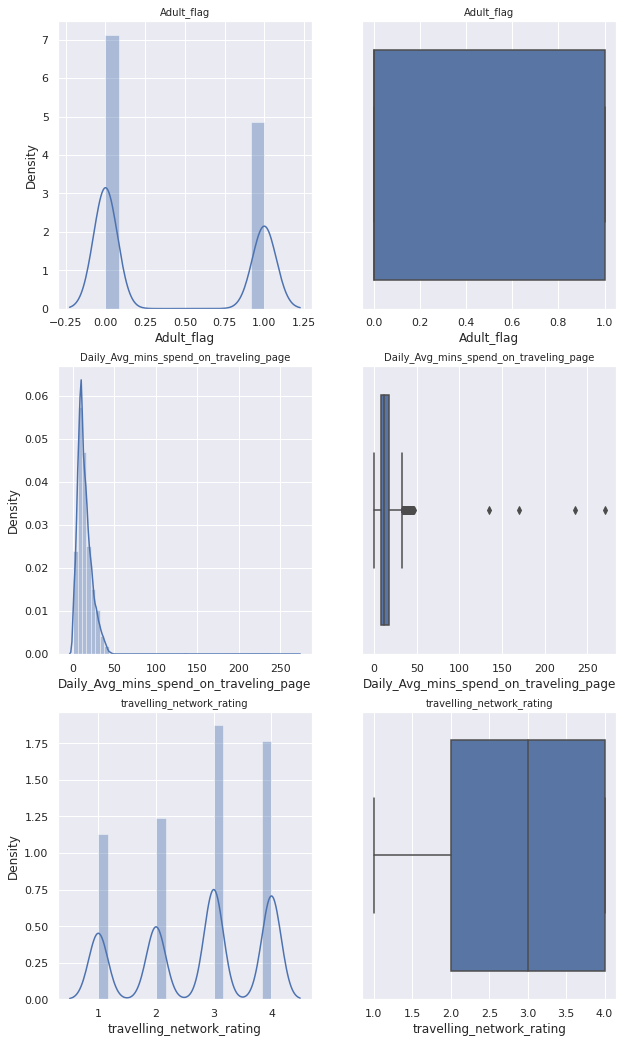

In [83]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(10,18)
a = sns.distplot(df['Adult_flag'],ax=axes[0][0])
a.set_title("Adult_flag",fontsize=10)

a = sns.boxplot(df['Adult_flag'] ,orient ="v",ax=axes[0][1])
a.set_title("Adult_flag",fontsize=10)


a = sns.distplot(df['Daily_Avg_mins_spend_on_traveling_page'], ax=axes[1][0])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'] , orient = "v" , ax=axes[1][1])
a.set_title("Daily_Avg_mins_spend_on_traveling_page",fontsize=10)

a = sns.distplot(df['travelling_network_rating'] , ax=axes[2][0])
a.set_title("travelling_network_rating",fontsize=10)

a = sns.boxplot(df['travelling_network_rating'] , orient = "v" , ax=axes[2][1])
a.set_title("travelling_network_rating",fontsize=10)

plt.show()


##Outlier Check

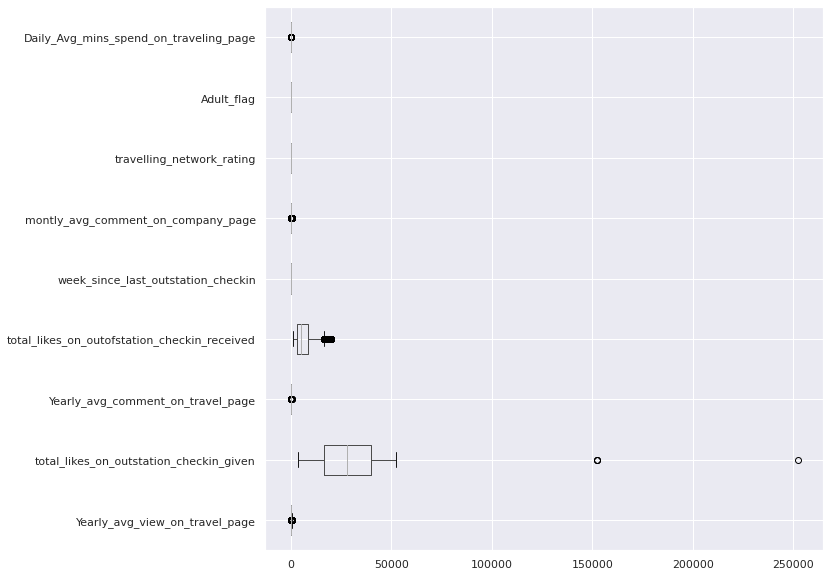

In [84]:
# Outlier Check
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

##Outlier Treatment

In [85]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [86]:
for column in df.columns:
    lr,ur=remove_outlier(df['Yearly_avg_comment_on_travel_page'])
    df['Yearly_avg_comment_on_travel_page']=np.where(df['Yearly_avg_comment_on_travel_page']>ur,ur,df['Yearly_avg_comment_on_travel_page'])
    df['Yearly_avg_comment_on_travel_page']=np.where(df['Yearly_avg_comment_on_travel_page']<lr,lr,df['Yearly_avg_comment_on_travel_page'])


    lr,ur=remove_outlier(df['Yearly_avg_view_on_travel_page'])
    df['Yearly_avg_view_on_travel_page']=np.where(df['Yearly_avg_view_on_travel_page']>ur,ur,df['Yearly_avg_view_on_travel_page'])
    df['Yearly_avg_view_on_travel_page']=np.where(df['Yearly_avg_view_on_travel_page']<lr,lr,df['Yearly_avg_view_on_travel_page'])

    lr,ur=remove_outlier(df['total_likes_on_outstation_checkin_given'])
    df['total_likes_on_outstation_checkin_given']=np.where(df['total_likes_on_outstation_checkin_given']>ur,ur,df['total_likes_on_outstation_checkin_given'])
    df['total_likes_on_outstation_checkin_given']=np.where(df['total_likes_on_outstation_checkin_given']<lr,lr,df['total_likes_on_outstation_checkin_given'])

    lr,ur=remove_outlier(df['total_likes_on_outofstation_checkin_received'])
    df['total_likes_on_outofstation_checkin_received']=np.where(df['total_likes_on_outofstation_checkin_received']>ur,ur,df['total_likes_on_outofstation_checkin_received'])
    df['total_likes_on_outofstation_checkin_received']=np.where(df['total_likes_on_outofstation_checkin_received']<lr,lr,df['total_likes_on_outofstation_checkin_received'])
    
    lr,ur=remove_outlier(df['montly_avg_comment_on_company_page'])
    df['montly_avg_comment_on_company_page']=np.where(df['montly_avg_comment_on_company_page']>ur,ur,df['montly_avg_comment_on_company_page'])
    df['montly_avg_comment_on_company_page']=np.where(df['montly_avg_comment_on_company_page']<lr,lr,df['montly_avg_comment_on_company_page'])


    lr,ur=remove_outlier(df['Daily_Avg_mins_spend_on_traveling_page'])
    df['Daily_Avg_mins_spend_on_traveling_page']=np.where(df['Daily_Avg_mins_spend_on_traveling_page']>ur,ur,df['Daily_Avg_mins_spend_on_traveling_page'])
    df['Daily_Avg_mins_spend_on_traveling_page']=np.where(df['Daily_Avg_mins_spend_on_traveling_page']<lr,lr,df['Daily_Avg_mins_spend_on_traveling_page'])

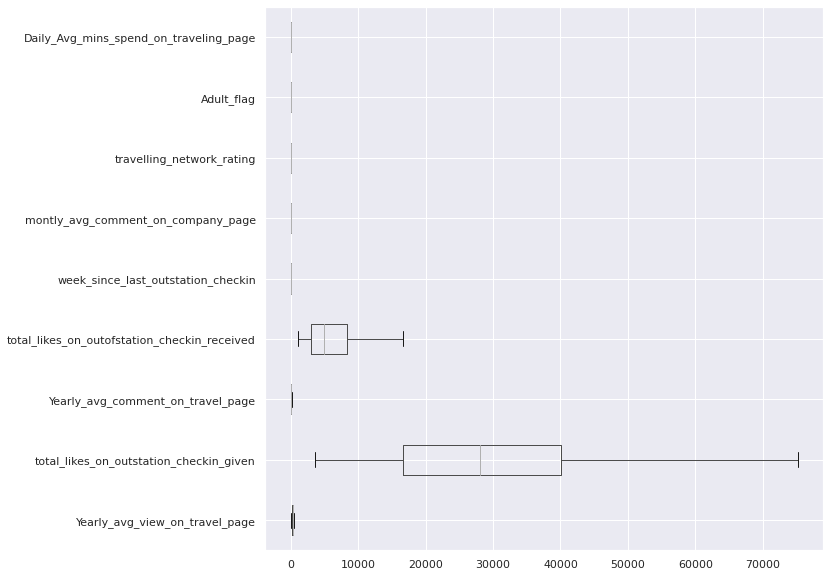

In [87]:
# Outlier Check
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

##Skewness in Data

In [88]:
df.skew()

Taken_product                                   1.842719
Yearly_avg_view_on_travel_page                  0.467096
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.006904
yearly_avg_Outstation_checkins                  0.977245
member_in_family                                0.001205
preferred_location_type                         0.486200
Yearly_avg_comment_on_travel_page              -0.074694
total_likes_on_outofstation_checkin_received    1.163915
week_since_last_outstation_checkin              0.915334
following_company_page                          0.983751
montly_avg_comment_on_company_page              0.503916
working_flag                                    1.920166
travelling_network_rating                      -0.302557
Adult_flag                                      0.385231
Daily_Avg_mins_spend_on_traveling_page          0.719267
dtype: float64

##Analyzing Categorical Variable Frquencies levels using seaborn countplots which gives the counts of observations in each category

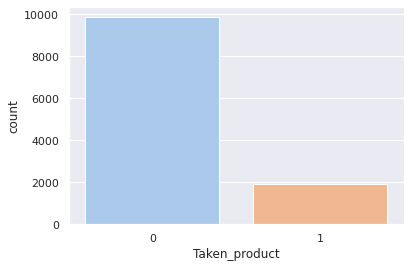

In [89]:
sns.countplot(x='Taken_product',data=df,palette='pastel')

In [90]:
df['Taken_product'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Taken_product, dtype: float64

In [91]:
df.preferred_device.value_counts()

1.0    10652
0.0     1108
Name: preferred_device, dtype: int64

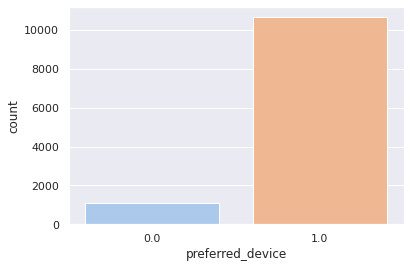

In [92]:
sns.countplot(x='preferred_device',data=df,palette='pastel')

In [93]:

df['preferred_device'].value_counts(normalize=True)

1.0    0.905782
0.0    0.094218
Name: preferred_device, dtype: float64

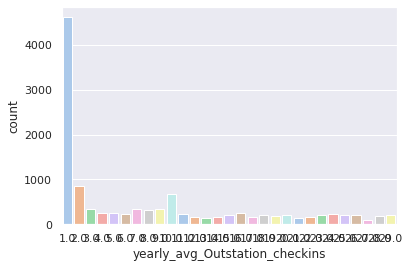

In [94]:
fig.dims=(25,15)
sns.countplot(x='yearly_avg_Outstation_checkins',data=df,palette='pastel')

In [95]:
df['yearly_avg_Outstation_checkins'].value_counts(normalize=True)

1.0     0.392772
2.0     0.071769
10.0    0.057993
9.0     0.028912
3.0     0.028571
7.0     0.028571
8.0     0.027211
5.0     0.022194
4.0     0.021769
16.0    0.021684
6.0     0.020068
11.0    0.019473
24.0    0.018963
29.0    0.018282
23.0    0.018282
18.0    0.017687
15.0    0.017517
20.0    0.016922
26.0    0.016922
25.0    0.016837
28.0    0.015306
19.0    0.014966
14.0    0.014201
17.0    0.013605
12.0    0.013520
22.0    0.012925
13.0    0.012755
21.0    0.012160
27.0    0.008163
Name: yearly_avg_Outstation_checkins, dtype: float64

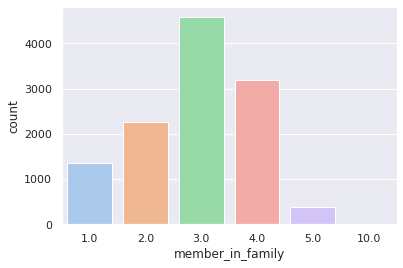

In [96]:
sns.countplot(x='member_in_family',data=df,palette='pastel')

In [97]:
# mobile=df1.loc[df1.preferred_device==1]

In [98]:
df['member_in_family'].value_counts(normalize=True)

3.0     0.389116
4.0     0.270748
2.0     0.191837
1.0     0.114711
5.0     0.032653
10.0    0.000935
Name: member_in_family, dtype: float64

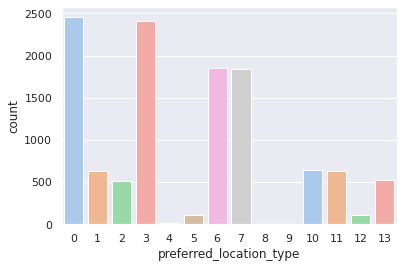

In [99]:
sns.countplot(x='preferred_location_type',data=df,palette='pastel')

In [100]:
df['preferred_location_type'].value_counts(normalize=True)

0     0.208759
3     0.204847
6     0.157823
7     0.156888
10    0.054677
1     0.054082
11    0.053827
13    0.044898
2     0.043878
5     0.009184
12    0.009099
4     0.001020
9     0.000595
8     0.000425
Name: preferred_location_type, dtype: float64

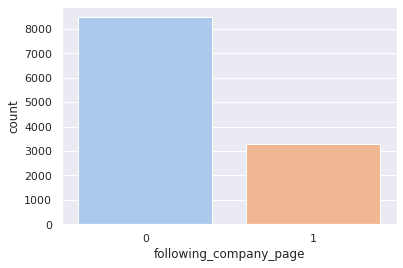

In [101]:

sns.countplot(x='following_company_page',data=df,palette='pastel')

In [102]:
df['following_company_page'].value_counts(normalize=True)

0    0.720663
1    0.279337
Name: following_company_page, dtype: float64

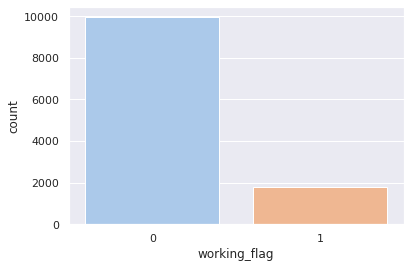

In [103]:
sns.countplot(x='working_flag',data=df,palette='pastel')

In [104]:
df['working_flag'].value_counts(normalize=True)

0    0.846259
1    0.153741
Name: working_flag, dtype: float64

##Bivariate Analysis : We will pick two numerical variable and try to understand the relationship between them .

In [105]:
import seaborn as sns
import scipy.stats as stats


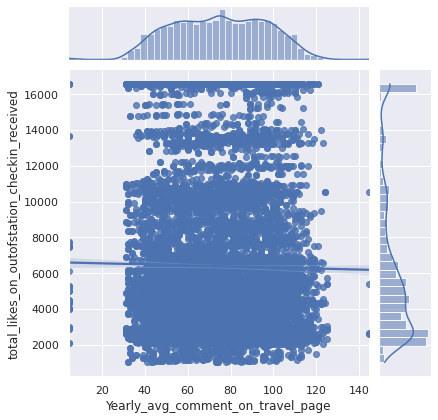

In [106]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Yearly_avg_comment_on_travel_page',y='total_likes_on_outofstation_checkin_received',data = df, kind='reg')
plt.show()

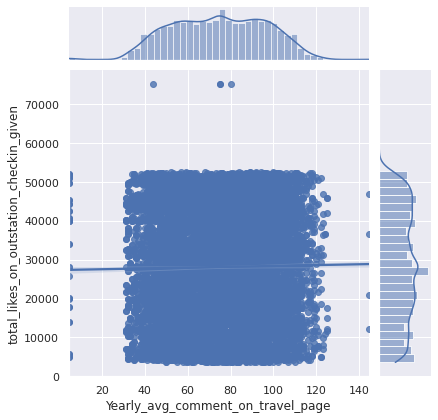

In [107]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Yearly_avg_comment_on_travel_page',y='total_likes_on_outstation_checkin_given',data = df, kind='reg')
plt.show()

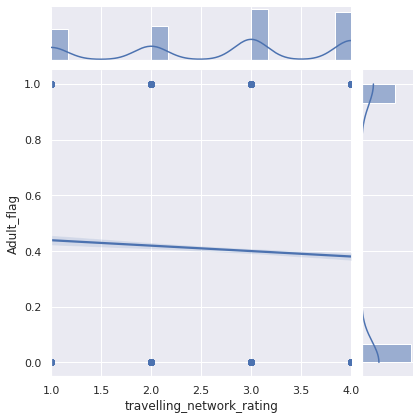

In [108]:
# sns.scatterplot(x='travelling_network_rating',y='Adult_flag',data=social)
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='travelling_network_rating',y='Adult_flag',data = df, kind='reg')
plt.show()

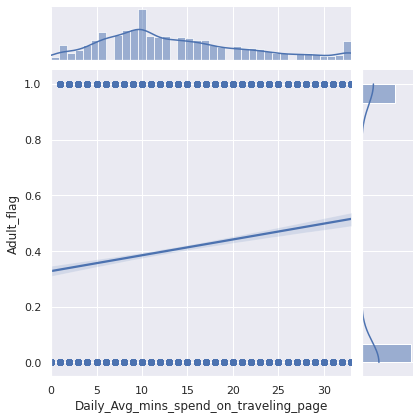

In [109]:

sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Daily_Avg_mins_spend_on_traveling_page',y='Adult_flag',data = df, kind='reg')
plt.show()


##Bivariate for 2 categorical variables

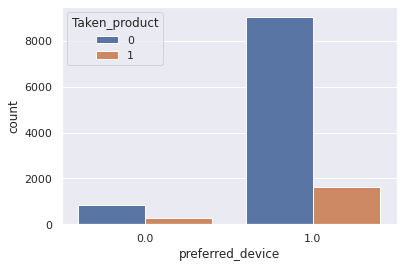

In [110]:
sns.countplot(x='preferred_device',hue='Taken_product',data =df )

In [111]:
pd.crosstab(df['preferred_device'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
preferred_device,,,
0.0,0.070748,0.023469,0.094218
1.0,0.768027,0.137755,0.905782
All,0.838776,0.161224,1.000000


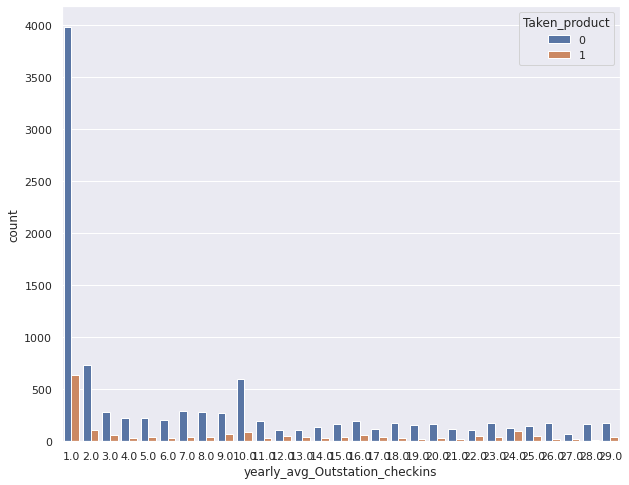

In [112]:

plt.figure(figsize=(10,8))
sns.countplot(x='yearly_avg_Outstation_checkins',hue='Taken_product',data =df )

In [113]:
pd.crosstab(df['yearly_avg_Outstation_checkins'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
yearly_avg_Outstation_checkins,,,
1.0,0.338350,0.054422,0.392772
2.0,0.062245,0.009524,0.071769
3.0,0.023810,0.004762,0.028571
4.0,0.018707,0.003061,0.021769
5.0,0.018793,0.003401,0.022194
6.0,0.017687,0.002381,0.020068
7.0,0.024830,0.003741,0.028571
8.0,0.023810,0.003401,0.027211
9.0,0.022789,0.006122,0.028912


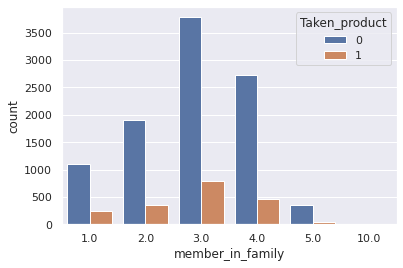

In [114]:
sns.countplot(x='member_in_family',hue='Taken_product',data =df )

In [115]:
pd.crosstab(df['member_in_family'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
member_in_family,,,
1.0,0.093707,0.021003,0.114711
2.0,0.161905,0.029932,0.191837
3.0,0.321769,0.067347,0.389116
4.0,0.231293,0.039456,0.270748
5.0,0.029252,0.003401,0.032653
10.0,0.000850,0.000085,0.000935
All,0.838776,0.161224,1.000000


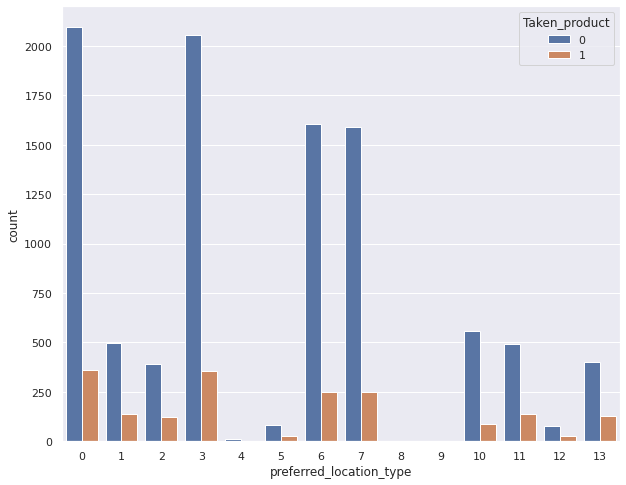

In [116]:
plt.figure(figsize=(10,8))
sns.countplot(x='preferred_location_type',hue='Taken_product',data =df )

In [117]:
pd.crosstab(df['preferred_location_type'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
preferred_location_type,,,
0,0.178231,0.030527,0.208759
1,0.042177,0.011905,0.054082
2,0.033418,0.010459,0.043878
3,0.174745,0.030102,0.204847
4,0.000935,0.000085,0.001020
5,0.006803,0.002381,0.009184
6,0.136395,0.021429,0.157823
7,0.135459,0.021429,0.156888
8,0.000340,0.000085,0.000425


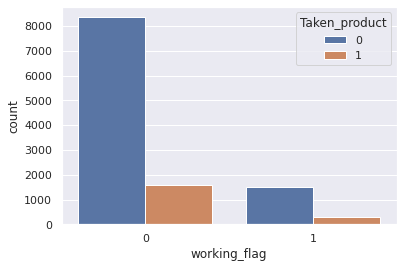

In [118]:
sns.countplot(x='working_flag',hue='Taken_product',data =df)

In [119]:
pd.crosstab(df['working_flag'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
working_flag,,,
0,0.710204,0.136054,0.846259
1,0.128571,0.025170,0.153741
All,0.838776,0.161224,1.000000


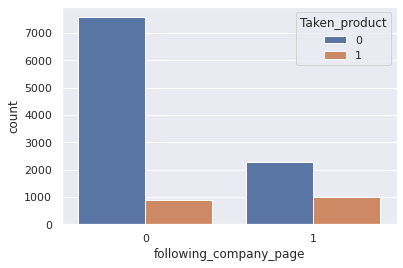

In [120]:
sns.countplot(x='following_company_page',hue='Taken_product',data =df )

In [121]:
pd.crosstab(df['following_company_page'],df['Taken_product'],margins=True,normalize=True)

Taken_product,0,1,All
following_company_page,,,
0,0.644728,0.075935,0.720663
1,0.194048,0.085289,0.279337
All,0.838776,0.161224,1.000000


##Bivariate analysis for categorical vs numeric variables

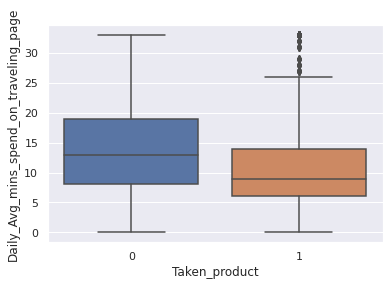

In [122]:
fig_dims=(12,10)
sns.boxplot(x='Taken_product',y='Daily_Avg_mins_spend_on_traveling_page',data=df)

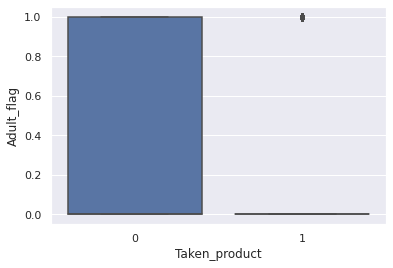

In [123]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Adult_flag',data=df)

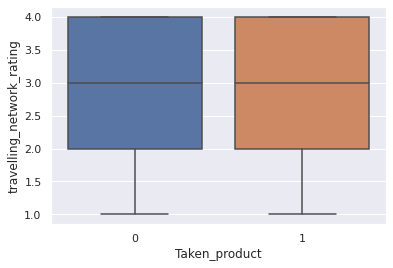

In [124]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='travelling_network_rating',data=df)

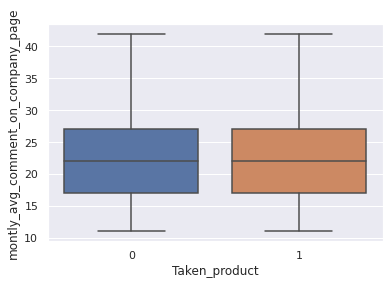

In [125]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='montly_avg_comment_on_company_page',data=df)

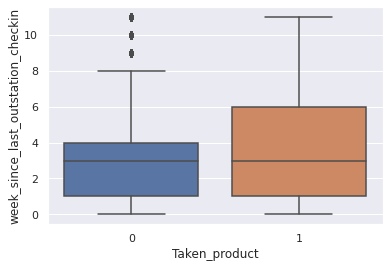

In [126]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='week_since_last_outstation_checkin',data=df)

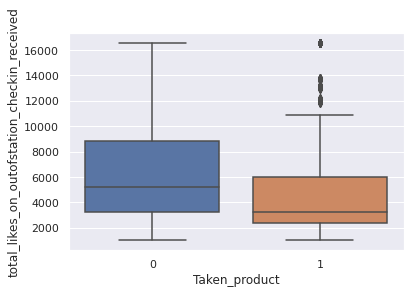

In [127]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='total_likes_on_outofstation_checkin_received',data=df)

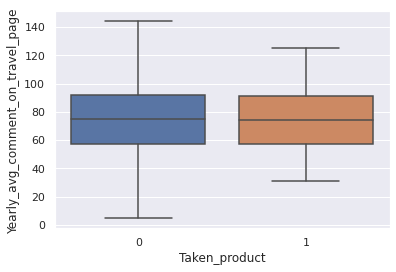

In [128]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_comment_on_travel_page',data=df)

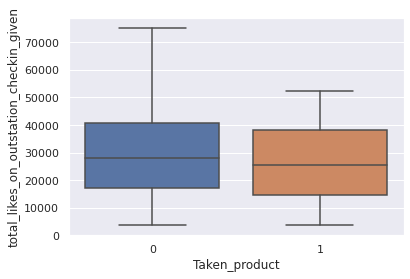

In [129]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='total_likes_on_outstation_checkin_given',data=df)

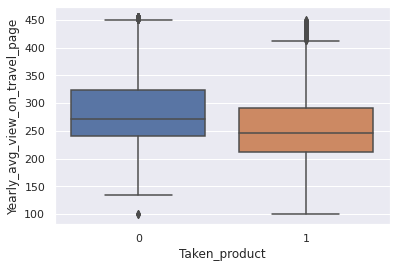

In [130]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df)

##Pairplot combination of all numeric field -Pairplot

<Figure size 1440x1296 with 0 Axes>

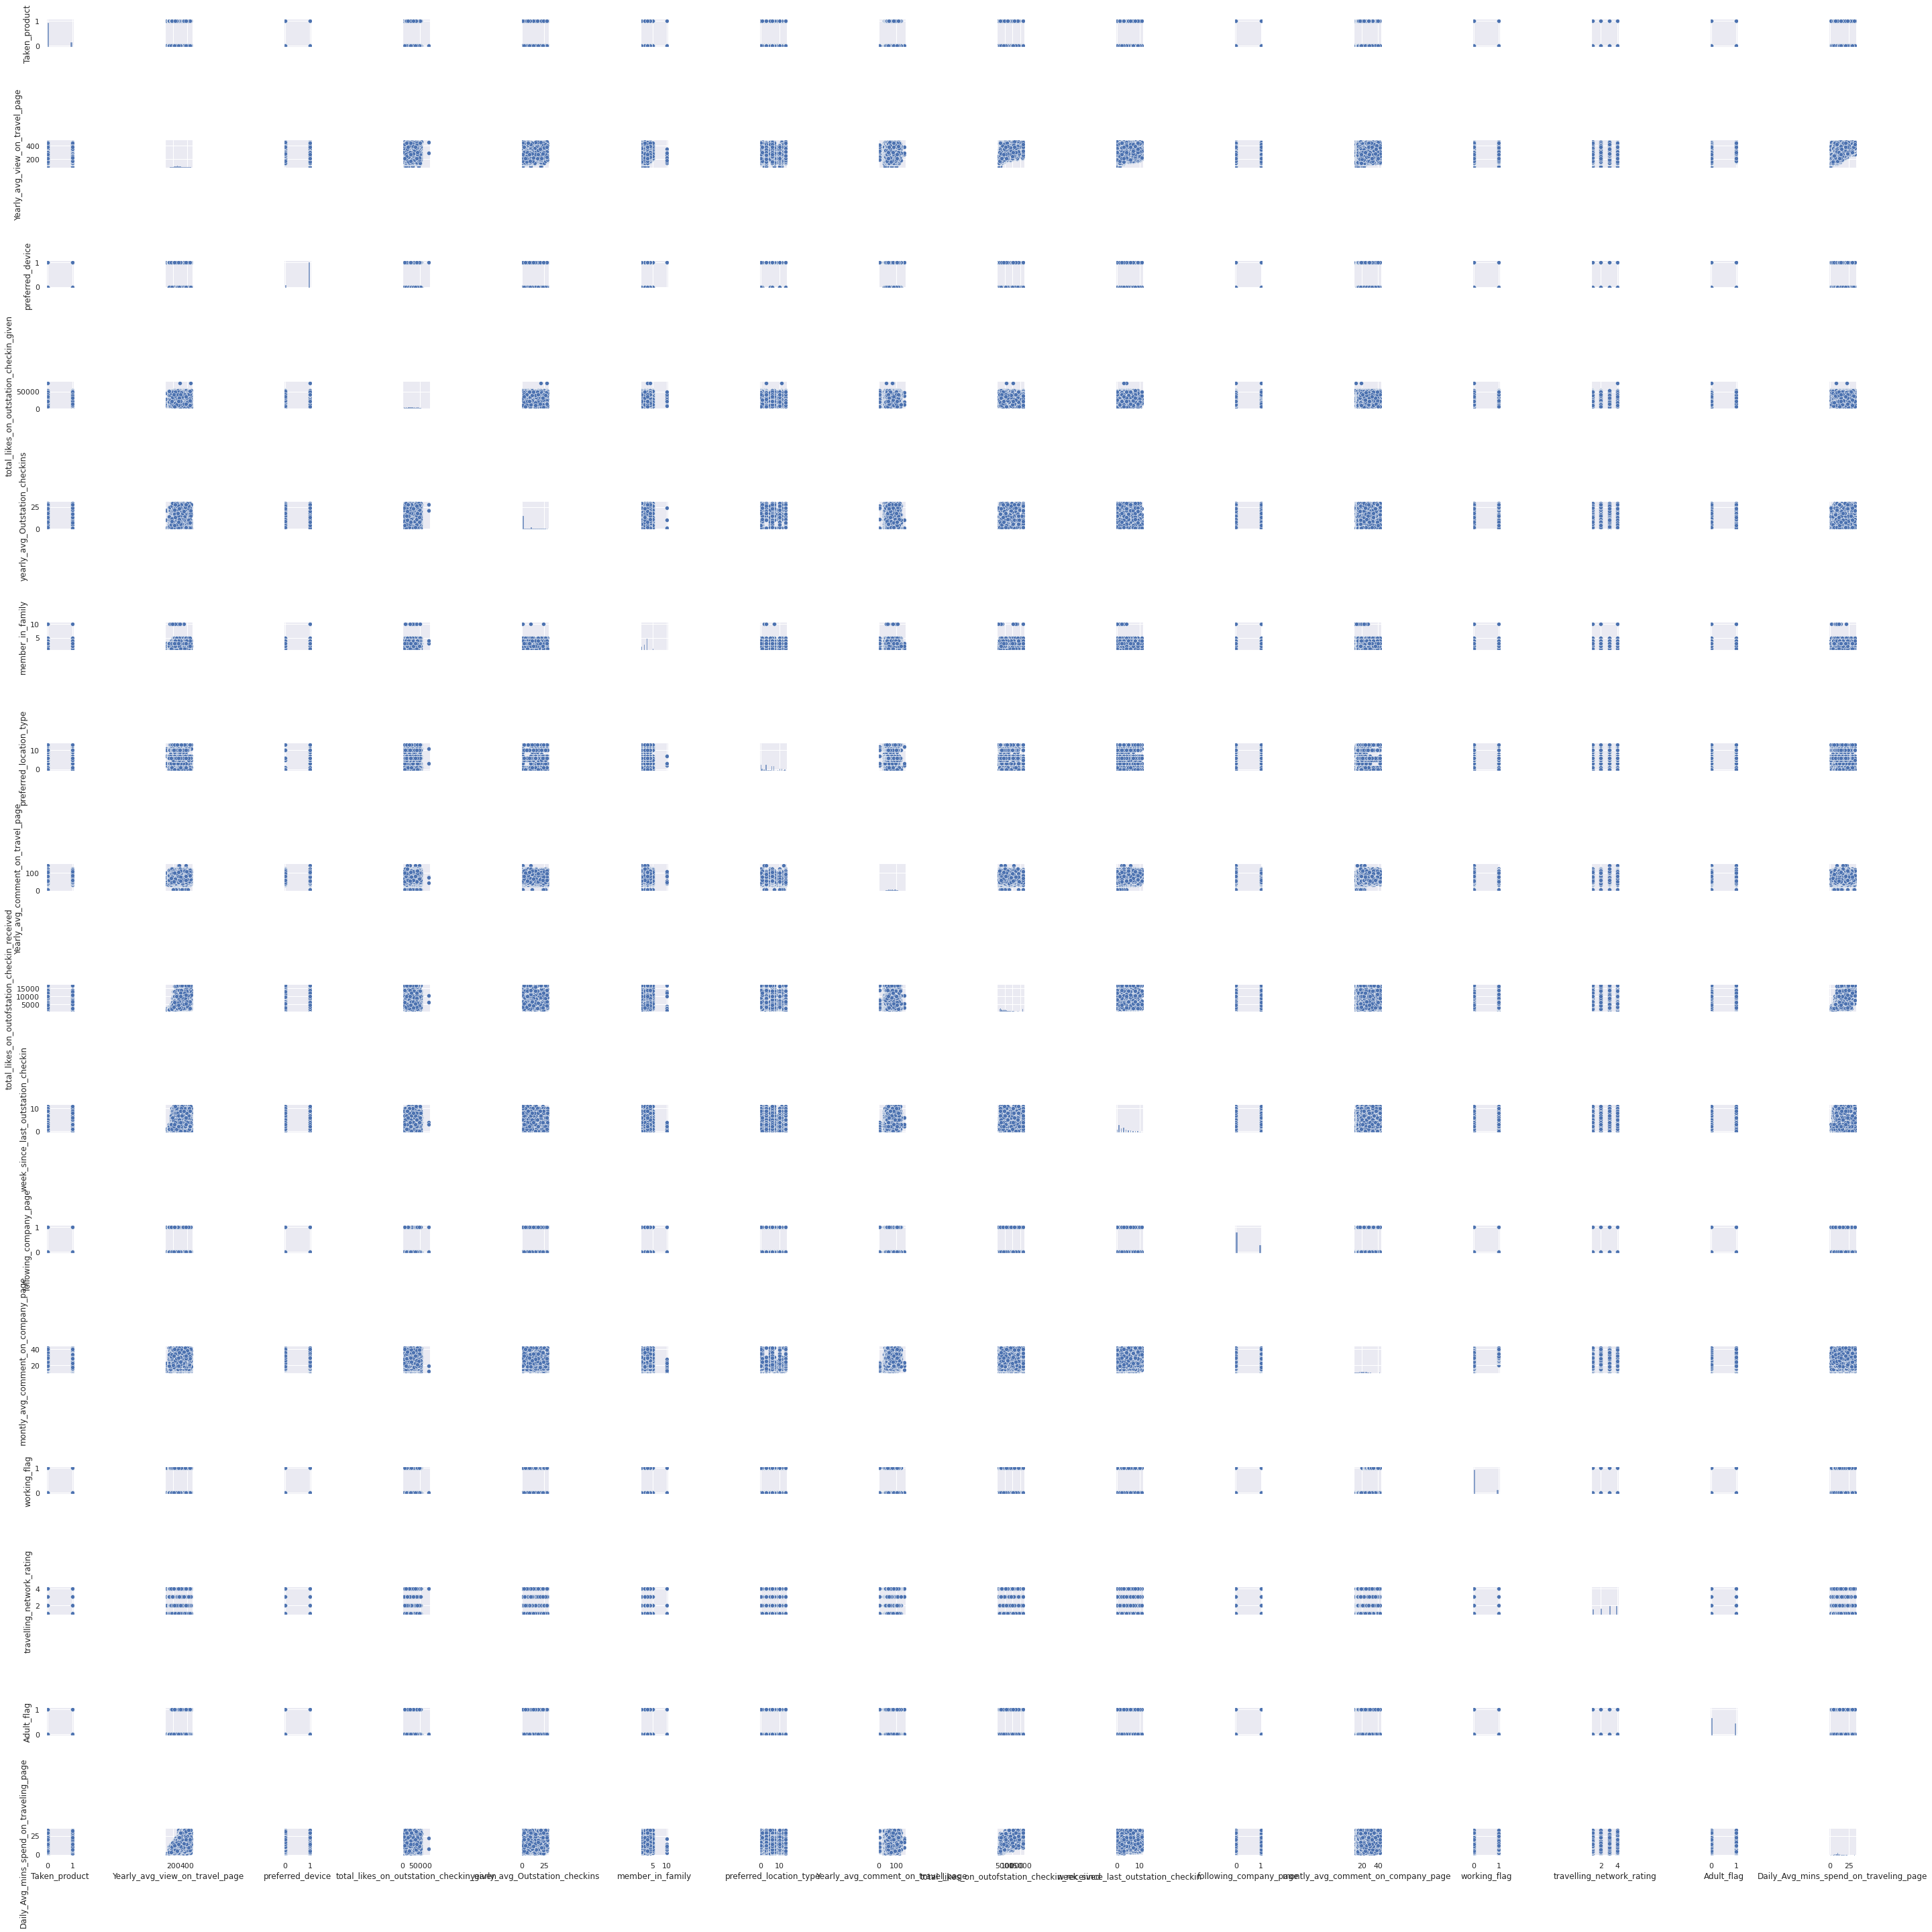

In [131]:
# plt.figure(figsize=(20,18))
# sns.pairplot(df)

##Multivariate Analysis

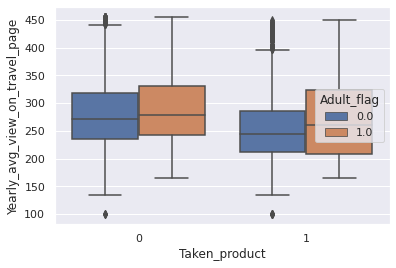

In [132]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df,hue='Adult_flag')

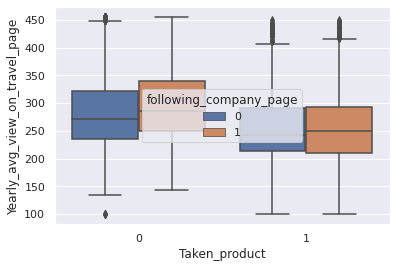

In [133]:
fig_dims=(12,5)
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=df,hue='following_company_page')

## Correlation Heatmap


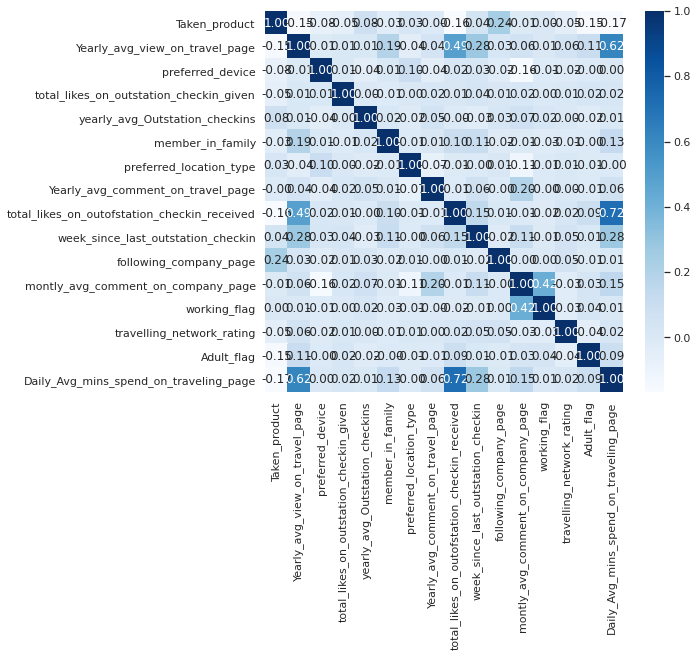

In [134]:

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

##Data separated for Mobile and laptops 

In [176]:
 laptop=df.loc[df.preferred_device==0]

In [177]:
laptop=laptop.to_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _Smita/Capstone Codework/aariv _capstone /New/label encoding /Aariv _Final Capstone -2/Laptop_File_Smita_Capstone Project Note_2/social_Laptop',index=False)

In [178]:
laptop = pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Capstone _Smita/Capstone Codework/aariv _capstone /New/label encoding /Aariv _Final Capstone -2/Laptop_File_Smita_Capstone Project Note_2/social_Laptop')

In [179]:
laptop.shape

(1108, 16)

In [180]:
laptop.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,0.0,9776.0,8.0,1.0,0,64.0,5142.0,1,0,33.0,1,4,1.0,10.0
1,0,255.0,0.0,48725.0,3.0,4.0,0,59.0,2913.0,1,1,19.0,0,3,0.0,8.0
2,0,250.0,0.0,35184.0,2.0,2.0,0,84.0,3074.0,0,0,23.0,0,3,0.0,8.0
3,0,295.0,0.0,7572.0,23.0,3.0,0,48.0,9532.0,0,0,33.0,1,2,0.0,10.0
4,1,250.0,0.0,39379.0,16.0,1.0,0,80.0,3926.0,1,1,33.0,1,2,0.0,10.0


In [181]:
laptop.drop(['preferred_device'],axis=1,inplace=True)

In [182]:
X = laptop.drop('Taken_product', axis=1)

y = laptop.pop("Taken_product")

X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,379.0,9776.0,8.0,1.0,0,64.0,5142.0,1,0,33.0,1,4,1.0,10.0
1,255.0,48725.0,3.0,4.0,0,59.0,2913.0,1,1,19.0,0,3,0.0,8.0
2,250.0,35184.0,2.0,2.0,0,84.0,3074.0,0,0,23.0,0,3,0.0,8.0
3,295.0,7572.0,23.0,3.0,0,48.0,9532.0,0,0,33.0,1,2,0.0,10.0
4,250.0,39379.0,16.0,1.0,0,80.0,3926.0,1,1,33.0,1,2,0.0,10.0


In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


##Build LDA Model(Linear Discriminate Analysis)

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection


In [187]:
LDA = LinearDiscriminantAnalysis()
model=LDA.fit(X_train,y_train)


# Training Data Class Prediction with a cut-off value of 0.5-LDA

In [188]:
pred_class_train = model.predict(X_train)



# Test Data Class Prediction with a cut-off value of 0.5-LDA

In [189]:
pred_class_test = model.predict(X_test)

# Comparing confusion matrix for Train set and Test Set-LDA Model

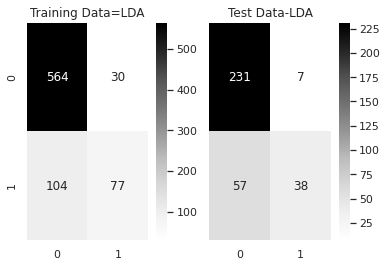

In [190]:
# Training Data and Test Data Confusion Matrix Comparison
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)



plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data=LDA')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data-LDA');

#  Comparision of classification report on Train set and Test set-LDA

In [148]:
print('Classification Report of the training data-LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data-LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data-LDA:

               precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.43      0.53       181

    accuracy                           0.83       775
   macro avg       0.78      0.69      0.71       775
weighted avg       0.82      0.83      0.81       775
 

Classification Report of the test data-LDA:

               precision    recall  f1-score   support

           0       0.80      0.97      0.88       238
           1       0.84      0.40      0.54        95

    accuracy                           0.81       333
   macro avg       0.82      0.69      0.71       333
weighted avg       0.81      0.81      0.78       333
 



In [191]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [192]:
# pred_prob_train[:,1]

# Comparision of ROC-AUC Scores on Train and Test Set-LDA Model

AUC for the Training Data-LDA: 0.817
AUC for the Test Data-LDA: 0.845


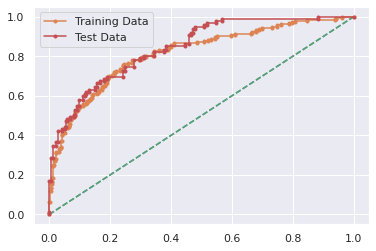

In [193]:
# Calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data-LDA: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data-LDA: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [194]:
# Cut off values for LDA Model

0.1 

Accuracy Score 0.5174
F1 Score 0.4672 

Recall 0.9061 

Confusion Matrix-LDA


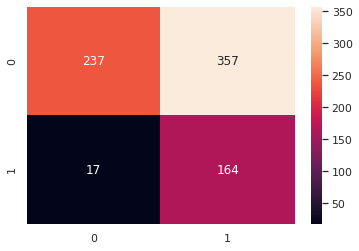

0.2 

Accuracy Score 0.7187
F1 Score 0.5692 

Recall 0.7956 

Confusion Matrix-LDA


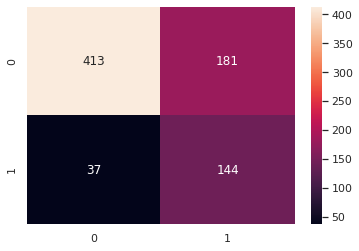

0.3 

Accuracy Score 0.7819
F1 Score 0.5827 

Recall 0.6519 

Confusion Matrix-LDA


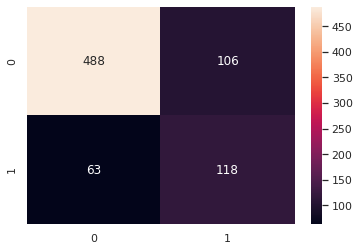

0.4 

Accuracy Score 0.8206
F1 Score 0.5775 

Recall 0.5249 

Confusion Matrix-LDA


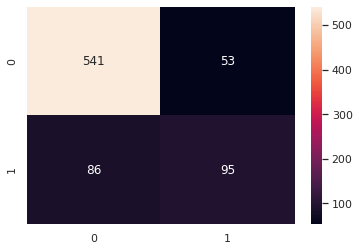

0.5 

Accuracy Score 0.8271
F1 Score 0.5347 

Recall 0.4254 

Confusion Matrix-LDA


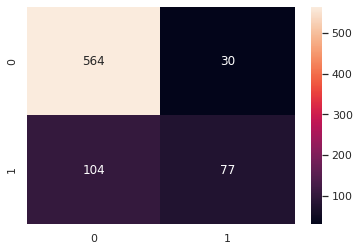

0.6 

Accuracy Score 0.8155
F1 Score 0.4066 

Recall 0.2707 

Confusion Matrix-LDA


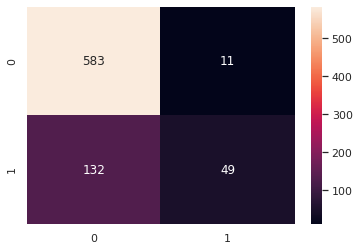

0.7 

Accuracy Score 0.7961
F1 Score 0.2617 

Recall 0.1547 

Confusion Matrix-LDA


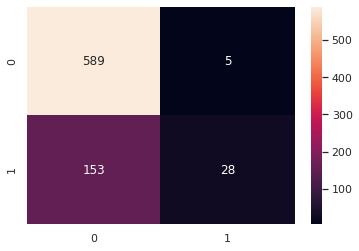

0.8 

Accuracy Score 0.7858
F1 Score 0.1616 

Recall 0.0884 

Confusion Matrix-LDA


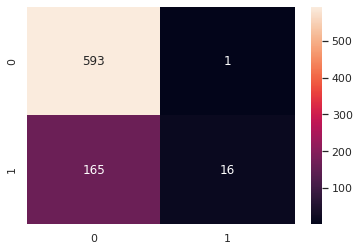

0.9 

Accuracy Score 0.7716
F1 Score 0.0432 

Recall 0.0221 

Confusion Matrix-LDA


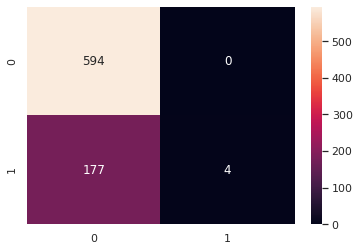

In [195]:

for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    
    plt.figure(figsize=(6,4))
    print('Recall',round(metrics.recall_score(y_train,custom_cutoff_data),4),'\n')
    print('Confusion Matrix-LDA')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [154]:
#Predicting the classes on the test set-LDA

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

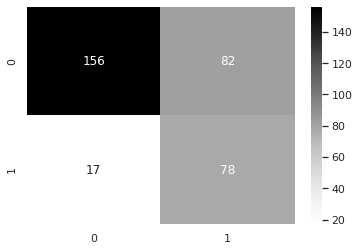

In [155]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

## Classification Report of default cut off test data and custom cut off -LDA Model

In [156]:
print('Classification Report of the default cut-off test data-LDA:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data-LDA:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data-LDA:

               precision    recall  f1-score   support

           0       0.80      0.97      0.88       238
           1       0.84      0.40      0.54        95

    accuracy                           0.81       333
   macro avg       0.82      0.69      0.71       333
weighted avg       0.81      0.81      0.78       333
 



Classification Report of the custom cut-off test data-LDA:

               precision    recall  f1-score   support

           0       0.90      0.66      0.76       238
           1       0.49      0.82      0.61        95

    accuracy                           0.70       333
   macro avg       0.69      0.74      0.69       333
weighted avg       0.78      0.70      0.72       333
 



# Linear Discriminate Analysis(After Hyperparameter tunning)

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV

In [158]:
param_grid = { 'solver':['svd','lsqr','eigen'], 'tol':[0.1,.001,.01],'shrinkage':['auto','float','none']}
lda_model= LinearDiscriminantAnalysis()

In [159]:
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [160]:
# grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5)
# grid_search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [161]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.1)

# Predicting Train and Test set -LDA Model(After Hyperparameter Tuning)

In [162]:
ytrain_predict = best_grid.predict(X_train)


In [163]:
ytest_predict = best_grid.predict(X_test)


# Performance Evaluation on training set-LDA(After Hyperparameter Tunning)

Confusion Matrix -Train set-LDA (After Hyperparameter Tunning)

In [164]:
confusion_matrix(y_train,ytrain_predict)

array([[567,  27],
       [106,  75]])

In [165]:
LDA_train_acc=best_grid.score(X_train,y_train) 
LDA_train_acc

0.8283870967741935

# Classification report on Train set -LDA (After Hyperparameter Tuning )

In [166]:
print('Classification Report train data-LDA(Gridsearch):\n\n',classification_report(y_train,ytrain_predict))


Classification Report train data-LDA(Gridsearch):

               precision    recall  f1-score   support

           0       0.84      0.95      0.90       594
           1       0.74      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.79      0.68      0.71       775
weighted avg       0.82      0.83      0.81       775



AUC-ROC Scores for Train set-LDA( After Hyperparameter Tuning ) 

Area under Curve on train -LDA Gridserach
AUC for the Test Data-LDA: 0.817


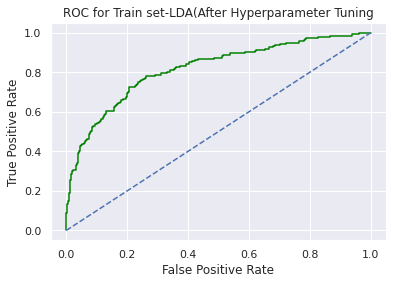

In [201]:
train_fpr, train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(train_fpr,train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Train set-LDA(After Hyperparameter Tuning')
LDA_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve on train -LDA Gridserach')
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Test Data-LDA: %.3f' % auc)

# Performance Evaluation on Test set-LDA(After Hyperparameter Tuning)

Confusion Matrix on Test set-LDA(After HyperParameter Tuning)

In [168]:
confusion_matrix(y_test,ytest_predict)

array([[231,   7],
       [ 57,  38]])

In [169]:
LDA_test_acc=best_grid.score(X_test,y_test)
LDA_test_acc

0.8078078078078078

# Classification Report on test set -LDA(After Hyperparameter Tuning)

In [170]:
print('Classification Report test data-LDA(Gridsearch):\n\n',classification_report(y_test,ytest_predict))

Classification Report test data-LDA(Gridsearch):

               precision    recall  f1-score   support

           0       0.80      0.97      0.88       238
           1       0.84      0.40      0.54        95

    accuracy                           0.81       333
   macro avg       0.82      0.69      0.71       333
weighted avg       0.81      0.81      0.78       333



# ROC-AUC Scores on Test Set -LDA(After Hyperparameter Tuning)

Area under Curve on test-LDA(Gridsearch is 0.8461742591773551


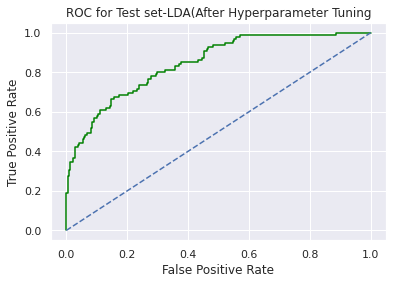

In [202]:
test_fpr, test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(test_fpr,test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test set-LDA(After Hyperparameter Tuning')
test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve on test-LDA(Gridsearch is', test_auc)


# Compare Confusion Matrix on Train and Test set-LDA (After Hyperparameter Tuuning)

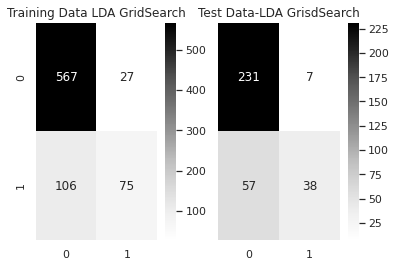

In [172]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data LDA GridSearch')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data-LDA GrisdSearch');

# Compare Classification Report for LDA models-train and test data

In [173]:
print('Classification Report train data-LDA:\n\n',classification_report(y_train,ytrain_predict))
print('Classification Report train data-LDA:\n\n',classification_report(y_test,ytest_predict))

Classification Report train data-LDA:

               precision    recall  f1-score   support

           0       0.84      0.95      0.90       594
           1       0.74      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.79      0.68      0.71       775
weighted avg       0.82      0.83      0.81       775

Classification Report train data-LDA:

               precision    recall  f1-score   support

           0       0.80      0.97      0.88       238
           1       0.84      0.40      0.54        95

    accuracy                           0.81       333
   macro avg       0.82      0.69      0.71       333
weighted avg       0.81      0.81      0.78       333



# Compare ROC curves and Calculate Area under the curve for LDA models-train and test data

Area under Curve on Train data for LDA  GridSearch Model is 0.8162378852986587
Area under Curve on test Data for LDA GridSearch Model is 0.8461742591773551


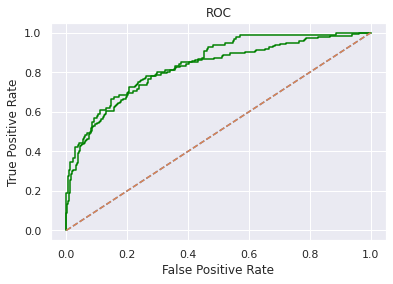

In [203]:
train_fpr, train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(train_fpr,train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve on Train data for LDA  GridSearch Model is',train_auc)
test_fpr, test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(test_fpr,test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve on test Data for LDA GridSearch Model is', test_auc)

# LDA_Smote

In [204]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [205]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [206]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Performance Matrix on train data set with SMOTE LDA

In [207]:
y_train_predict = LDA_model.predict(X_train_res)
model_score = LDA_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7735690235690236
[[442 152]
 [117 477]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       594
           1       0.76      0.80      0.78       594

    accuracy                           0.77      1188
   macro avg       0.77      0.77      0.77      1188
weighted avg       0.77      0.77      0.77      1188



In [208]:
## Performance Matrix on test data set Smote LDA

In [209]:

y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7267267267267268
[[168  70]
 [ 21  74]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       238
           1       0.51      0.78      0.62        95

    accuracy                           0.73       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.73      0.74       333



In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [211]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',775+333)

X_train (775, 14)
X_test (333, 14)
y_train (775,)
y_test (333,)
Total Obs 1108


Logistic Model(With RFE using Sklearn)-Model A

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [213]:
# For modeling we will use Logistic Regression with recursive feature elimination
Logistic = LogisticRegression()

In [214]:
selector = RFE(estimator = Logistic, n_features_to_select=10, step=1)

In [215]:
selector = selector.fit(X_train, y_train)

In [216]:
selector.n_features_

10

In [217]:
selector.ranking_

array([3, 5, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1])

In [218]:
df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
2,yearly_avg_Outstation_checkins,1
3,member_in_family,1
4,preferred_location_type,1
7,week_since_last_outstation_checkin,1
8,following_company_page,1
9,montly_avg_comment_on_company_page,1
10,working_flag,1
11,travelling_network_rating,1
12,Adult_flag,1
13,Daily_Avg_mins_spend_on_traveling_page,1


In [219]:
# Validating the model on train and test set
from sklearn.metrics import confusion_matrix, classification_report

In [220]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [221]:
print(confusion_matrix(y_train, pred_train))

[[568  26]
 [119  62]]


In [222]:
print('Classification Report train data-Logistic Regression(RFE):\n\n',classification_report(y_train, pred_train))

Classification Report train data-Logistic Regression(RFE):

               precision    recall  f1-score   support

           0       0.83      0.96      0.89       594
           1       0.70      0.34      0.46       181

    accuracy                           0.81       775
   macro avg       0.77      0.65      0.67       775
weighted avg       0.80      0.81      0.79       775



In [223]:
print(confusion_matrix(y_test, pred_test))

[[228  10]
 [ 56  39]]


In [224]:
print('Classification Report test data-Logistic Regression(RFE):\n\n',classification_report(y_test, pred_test))

Classification Report test data-Logistic Regression(RFE):

               precision    recall  f1-score   support

           0       0.80      0.96      0.87       238
           1       0.80      0.41      0.54        95

    accuracy                           0.80       333
   macro avg       0.80      0.68      0.71       333
weighted avg       0.80      0.80      0.78       333



In [225]:
# We see poor recall score for both train and test

# Since only 16% of the total data had defaults, we will now try to balance the data before fiting the model.

Logistic Regression with RFE-Smote 

In [226]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [227]:
selector_smote = selector.fit(X_res, y_res)

In [228]:
selector_smote.n_features_

10

In [229]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [230]:

print('Classification Report train data-Logistic Regression(Smote):\n\n',classification_report(y_res, pred_train_smote))

Classification Report train data-Logistic Regression(Smote):

               precision    recall  f1-score   support

           0       0.75      0.73      0.74       594
           1       0.74      0.76      0.75       594

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



In [231]:
print('Classification Report test data-Logistic Regression(Smote):\n\n',classification_report(y_test, pred_test_smote))

Classification Report test data-Logistic Regression(Smote):

               precision    recall  f1-score   support

           0       0.87      0.73      0.79       238
           1       0.52      0.74      0.61        95

    accuracy                           0.73       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.73      0.74       333



# Logistic Regression(After Hyperparameter Tuning) 

In [233]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [234]:
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l2','l1','elasticnet'],
      'solver':['sag','lbfgs'],
     
      'tol':[0.0001,0.00001]},
      

Logistic_grid= LogisticRegression(max_iter=1000,tol=0.001,solver='newton-cg',penalty='12',verbose=True,n_jobs=2)

grid_search = GridSearchCV(estimator =Logistic_grid, param_grid = param_grid,cv=5)

In [235]:
best_grid=grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

In [236]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)


In [237]:
from matplotlib import pyplot

Feature: 0, Score: -0.00340
Feature: 1, Score: -0.00002
Feature: 2, Score: 0.04341
Feature: 3, Score: 0.00239
Feature: 4, Score: -0.03857
Feature: 5, Score: 0.01181
Feature: 6, Score: -0.00010
Feature: 7, Score: 0.19492
Feature: 8, Score: 1.71001
Feature: 9, Score: 0.03125
Feature: 10, Score: -0.09150
Feature: 11, Score: -0.35466
Feature: 12, Score: -0.81641
Feature: 13, Score: -0.07234


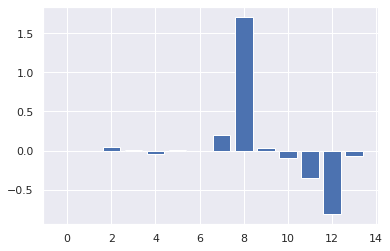

In [241]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [242]:
# Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

Classification Report train data-Logistic Regression(Gridserach):

               precision    recall  f1-score   support

           0       0.84      0.95      0.90       594
           1       0.74      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.79      0.68      0.71       775
weighted avg       0.82      0.83      0.81       775
 



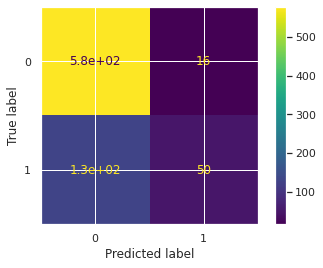

In [243]:
## Confusion matrix on the training data

plot_confusion_matrix(best_grid,X_train,y_train)
print('Classification Report train data-Logistic Regression(Gridserach):\n\n',classification_report(y_train,ytrain_predict),'\n');

AUC: 0.801


No handles with labels found to put in legend.


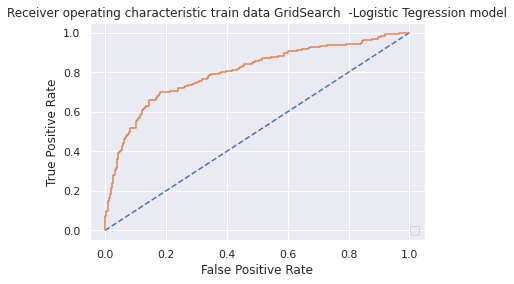

In [244]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data GridSearch  -Logistic Tegression model')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

Classification Report test data-Logistic Regression(Gridserach):

               precision    recall  f1-score   support

           0       0.78      0.95      0.86       238
           1       0.73      0.35      0.47        95

    accuracy                           0.78       333
   macro avg       0.76      0.65      0.67       333
weighted avg       0.77      0.78      0.75       333
 



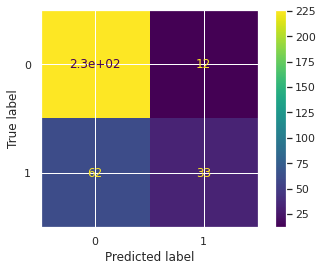

In [247]:
## Confusion matrix on the test data-Logistic Regression(Gridsearch)

plot_confusion_matrix(best_grid,X_test,y_test)
print('Classification Report test data-Logistic Regression(Gridserach):\n\n',classification_report(y_test,ytest_predict),'\n');

In [248]:
# Predicting on Training and Test dataset-Logistic Regression(Gridsearch)
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

No handles with labels found to put in legend.


AUC: 0.834


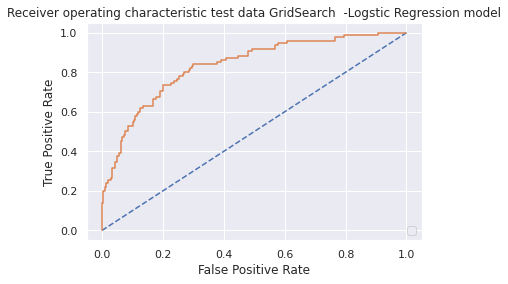

In [249]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data GridSearch  -Logstic Regression model')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

In [250]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.906239,0.093761
1,0.819104,0.180896
2,0.827321,0.172679
3,0.922418,0.077582
4,0.786833,0.213167


In [251]:
# Accuracy - Training Data
best_grid.score(X_train, y_train)

0.8103225806451613

In [252]:
# Accuracy - Test Data
best_grid.score(X_test, y_test)

0.7777777777777778

In [253]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [254]:
selector = LogisticRegression()
selector.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,selector.coef_[0][idx]))

The coefficient for Yearly_avg_view_on_travel_page is -0.0034922924263059724
The coefficient for total_likes_on_outstation_checkin_given is -1.4743031241956854e-05
The coefficient for yearly_avg_Outstation_checkins is 0.043695419811149216
The coefficient for member_in_family is 0.010125398772371438
The coefficient for preferred_location_type is -0.044354288811262015
The coefficient for Yearly_avg_comment_on_travel_page is 0.010387618924226854
The coefficient for total_likes_on_outofstation_checkin_received is -0.00011679629268887104
The coefficient for week_since_last_outstation_checkin is 0.08451892718124746
The coefficient for following_company_page is 0.03412483191808902
The coefficient for montly_avg_comment_on_company_page is 0.01886550695551076
The coefficient for working_flag is -0.0023895119609730958
The coefficient for travelling_network_rating is -0.016664257345038697
The coefficient for Adult_flag is -0.018435496508996032
The coefficient for Daily_Avg_mins_spend_on_traveling

In [255]:
intercept = selector.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0009442033175772484


In [256]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [-4.74236436e-04 -2.74760251e-06  6.05693593e-03  3.41875690e-04
 -5.38064847e-03  1.64709951e-03 -1.42007488e-05  2.71923769e-02
  2.38155666e-01  4.35603522e-03 -1.27307078e-02 -4.94447620e-02
 -1.13735308e-01 -1.00908146e-02]


In [257]:
# ElasticNet?

In [258]:
 from sklearn.linear_model import ElasticNet
 from sklearn.datasets import make_regression

In [259]:
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.5,random_state=1)

elastic.fit(X_train,y_train)
print ("Elastic model:", (elastic.coef_))
# search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

Elastic model: [-4.90630188e-04 -2.55101789e-06  5.60298419e-03  0.00000000e+00
 -4.71301162e-03  1.52498426e-03 -1.40688448e-05  2.47998138e-02
  2.26843168e-01  3.52596224e-03 -6.02651161e-03 -4.48513989e-02
 -1.05862762e-01 -9.05188370e-03]


In [260]:
ytrain_predict = elastic.predict(X_train)
ytest_predict = elastic.predict(X_test)

In [261]:
# Let us compare their scores
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))

0.22168738154158596
0.2737348433255635


In [262]:
# Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-7.11072219e-04 -2.80034458e-06  4.48136485e-03  0.00000000e+00
 -0.00000000e+00  1.39510902e-03 -1.90429270e-05  5.49443451e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.04930086e-03]


In [263]:
ytrain_predict = lasso.predict(X_train)
ytest_predict = lasso.predict(X_test)

In [264]:
# Let us compare their scores
print(selector.score(X_train, y_train))
print(selector.score(X_test, y_test))

0.7896774193548387
0.7387387387387387


In [265]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Adult_flag': -0.10586276157738059,
 'Daily_Avg_mins_spend_on_traveling_page': -0.009051883702174397,
 'Yearly_avg_comment_on_travel_page': 0.0015249842624484745,
 'Yearly_avg_view_on_travel_page': -0.0004906301882670299,
 'following_company_page': 0.22684316829109297,
 'member_in_family': 0.0,
 'montly_avg_comment_on_company_page': 0.0035259622404921528,
 'preferred_location_type': -0.004713011617160878,
 'total_likes_on_outofstation_checkin_received': -1.4068844808012249e-05,
 'total_likes_on_outstation_checkin_given': -2.5510178918785964e-06,
 'travelling_network_rating': -0.044851398939076456,
 'week_since_last_outstation_checkin': 0.024799813771282063,
 'working_flag': -0.006026511608885914,
 'yearly_avg_Outstation_checkins': 0.0056029841855317715}

Logistic Model using stats model-Model B

Approach -2 :We will check multicollinearity and look for insignificant features ,drops it untill we get all significant features .Build Logistic Regression model B .

In [266]:
import statsmodels.formula.api as SM

In [267]:

laptop_train = pd.concat([X_train,y_train], axis=1)
laptop_test = pd.concat([X_test,y_test], axis=1)

laptop_train.to_csv('mobile_train.csv',index=False)
laptop_test.to_csv('mobile_test.csv',index=False)

In [268]:
laptop_train.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
667,328.0,20006.0,8.0,3.0,0,81.0,16572.0,2,0,26.0,0,2,1.0,33.0,0
737,281.0,21306.0,7.0,3.0,1,96.0,4691.0,3,0,35.0,0,4,1.0,21.0,0
820,246.0,26433.0,26.0,4.0,1,86.0,5685.0,3,1,32.0,0,3,0.0,17.0,1
385,365.0,25177.0,27.0,2.0,0,85.0,6404.0,4,1,24.0,0,4,0.0,8.0,1
785,370.0,24832.0,7.0,2.0,6,113.0,2718.0,4,1,23.0,0,3,0.0,26.0,1


In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [275]:
X = laptop_train.drop('Taken_product', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Yearly_avg_view_on_travel_page,27.781068
9,montly_avg_comment_on_company_page,19.226614
5,Yearly_avg_comment_on_travel_page,13.890868
13,Daily_Avg_mins_spend_on_traveling_page,10.704991
3,member_in_family,8.855997
11,travelling_network_rating,7.963239
6,total_likes_on_outofstation_checkin_received,6.710497
1,total_likes_on_outstation_checkin_given,5.602525
7,week_since_last_outstation_checkin,2.960317
2,yearly_avg_Outstation_checkins,2.411795


In [276]:
X = X.drop('Yearly_avg_view_on_travel_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,montly_avg_comment_on_company_page,18.738008
4,Yearly_avg_comment_on_travel_page,13.337731
12,Daily_Avg_mins_spend_on_traveling_page,9.289308
2,member_in_family,8.234687
10,travelling_network_rating,7.377513
5,total_likes_on_outofstation_checkin_received,6.609971
0,total_likes_on_outstation_checkin_given,5.351708
6,week_since_last_outstation_checkin,2.925212
1,yearly_avg_Outstation_checkins,2.384647
3,preferred_location_type,1.752803


In [277]:
X = X.drop('montly_avg_comment_on_company_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Yearly_avg_comment_on_travel_page,10.756713
11,Daily_Avg_mins_spend_on_traveling_page,8.844576
2,member_in_family,7.973513
9,travelling_network_rating,6.948769
5,total_likes_on_outofstation_checkin_received,6.539642
0,total_likes_on_outstation_checkin_given,5.156772
6,week_since_last_outstation_checkin,2.910298
1,yearly_avg_Outstation_checkins,2.381276
3,preferred_location_type,1.718150
10,Adult_flag,1.670540


In [278]:
X = X.drop('Yearly_avg_comment_on_travel_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Daily_Avg_mins_spend_on_traveling_page,8.807961
2,member_in_family,7.275912
4,total_likes_on_outofstation_checkin_received,6.504967
8,travelling_network_rating,6.240781
0,total_likes_on_outstation_checkin_given,4.591616
5,week_since_last_outstation_checkin,2.901220
1,yearly_avg_Outstation_checkins,2.320020
3,preferred_location_type,1.691574
9,Adult_flag,1.650702
6,following_company_page,1.465380


In [279]:
X = X.drop('Daily_Avg_mins_spend_on_traveling_page', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,member_in_family,7.249801
8,travelling_network_rating,6.239802
0,total_likes_on_outstation_checkin_given,4.536756
4,total_likes_on_outofstation_checkin_received,3.411690
5,week_since_last_outstation_checkin,2.684616
1,yearly_avg_Outstation_checkins,2.238485
3,preferred_location_type,1.682323
9,Adult_flag,1.649212
6,following_company_page,1.465240
7,working_flag,1.211177


In [280]:
X = X.drop('member_in_family', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,travelling_network_rating,5.462706
0,total_likes_on_outstation_checkin_given,4.325592
3,total_likes_on_outofstation_checkin_received,3.198616
4,week_since_last_outstation_checkin,2.621987
1,yearly_avg_Outstation_checkins,2.140858
2,preferred_location_type,1.651180
8,Adult_flag,1.578637
5,following_company_page,1.443227
6,working_flag,1.210424


In [281]:
X = X.drop('travelling_network_rating', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,total_likes_on_outstation_checkin_given,3.419890
3,total_likes_on_outofstation_checkin_received,3.064329
4,week_since_last_outstation_checkin,2.416003
1,yearly_avg_Outstation_checkins,2.035355
2,preferred_location_type,1.627289
7,Adult_flag,1.573900
5,following_company_page,1.417988
6,working_flag,1.205279


In [282]:
import statsmodels.formula.api as SM

In [284]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'Taken_product ~total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+ preferred_location_type +yearly_avg_Outstation_checkins+ Adult_flag + following_company_page+working_flag', data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.441875
         Iterations 7


In [285]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.1870
Time:                        20:41:20   Log-Likelihood:                -342.45
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 5.170e-30
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0745      0.342      0.218      0.827      -0.595       0.744
total_likes_on_outstation_checkin_given      -2.439e-05    7.4e-06     -3.296      0.001   -3.89e-05   -9.89e-06
total_likes_on_outofstation_checkin_received    -0.0003   3.45e-05     -7.508      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1254      0.038      3.269      0.001       0.050       0.201
preferred_location_type                         -0.0406      0.024     -1.722      0.085      -0.087       0.006
yearly_avg_Outstation_checkins                   0.0347      0.011      3.169      0.002       0.013       0.056
Adult_flag                                      -0.8589      0.207     -4.150      0.000      -1.265      -0.453
following_company_page                           1.3909      0.196      7.083      0.000       1.006       1.776
working_flag                                    -0.0386      0.268     -0.144      0.886      -0.565       0.488
================================================================================================================
"""

In [287]:
# Eliminate working flag 

In [289]:
#Creating our first model using all variables
model_2= SM.logit(formula = 'Taken_product ~total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+ preferred_location_type +yearly_avg_Outstation_checkins+ Adult_flag + following_company_page', data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.441889
         Iterations 7


In [290]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.1870
Time:                        20:42:33   Log-Likelihood:                -342.46
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 1.055e-30
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0679      0.339      0.200      0.841      -0.596       0.732
total_likes_on_outstation_checkin_given      -2.441e-05    7.4e-06     -3.301      0.001   -3.89e-05   -9.92e-06
total_likes_on_outofstation_checkin_received    -0.0003   3.45e-05     -7.510      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1259      0.038      3.295      0.001       0.051       0.201
preferred_location_type                         -0.0407      0.024     -1.725      0.085      -0.087       0.006
yearly_avg_Outstation_checkins                   0.0346      0.011      3.167      0.002       0.013       0.056
Adult_flag                                      -0.8581      0.207     -4.147      0.000      -1.264      -0.453
following_company_page                           1.3924      0.196      7.099      0.000       1.008       1.777
================================================================================================================
"""

In [292]:
# Eliminating preferred location 

In [294]:
model_3= SM.logit(formula = 'Taken_product ~total_likes_on_outstation_checkin_given+ total_likes_on_outofstation_checkin_received+ week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+ Adult_flag + following_company_page', data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.443856
         Iterations 7


In [295]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      768
Method:                           MLE   Df Model:                            6
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.1834
Time:                        20:44:15   Log-Likelihood:                -343.99
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 8.674e-31
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.1175      0.321     -0.366      0.714      -0.747       0.511
total_likes_on_outstation_checkin_given      -2.408e-05   7.33e-06     -3.286      0.001   -3.84e-05   -9.71e-06
total_likes_on_outofstation_checkin_received    -0.0003   3.42e-05     -7.398      0.000      -0.000      -0.000
week_since_last_outstation_checkin               0.1250      0.038      3.270      0.001       0.050       0.200
yearly_avg_Outstation_checkins                   0.0343      0.011      3.159      0.002       0.013       0.056
Adult_flag                                      -0.8335      0.205     -4.060      0.000      -1.236      -0.431
following_company_page                           1.3902      0.195      7.117      0.000       1.007       1.773
================================================================================================================
"""

In [297]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.1691373521490207


In [298]:
y_prob_pred_train = model_3.predict(laptop_train)

In [299]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [300]:
from sklearn import metrics

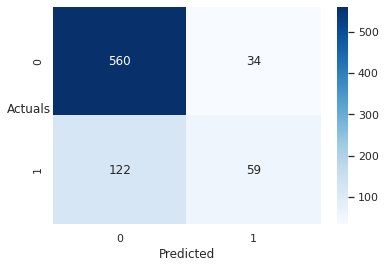

In [301]:
sns.heatmap((metrics.confusion_matrix(laptop_train['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [302]:
# Prediction on the Data
# Now, let us see the predicted probability values.

In [303]:
y_prob_pred_3 = model_3.predict()

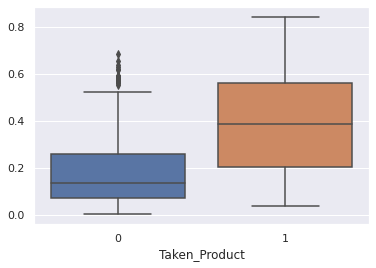

In [304]:
sns.boxplot(x=laptop_train['Taken_product'],y=y_prob_pred_3)
plt.xlabel('Taken_Product');

In [305]:
# Choosing the optimal threshold

In [306]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(laptop_train['Taken_product'],y_prob_pred_train)

In [307]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24555442576868508

In [308]:
# Validating on the train set with revised threshold

In [309]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.245:
        a=1
    else:
        a=0
    y_class_pred.append(a)

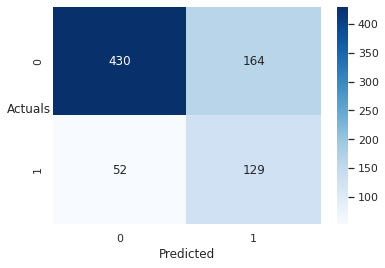

In [310]:
sns.heatmap((metrics.confusion_matrix(laptop_train['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [311]:
print(metrics.classification_report(laptop_train['Taken_product'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       594
           1       0.44      0.71      0.54       181

    accuracy                           0.72       775
   macro avg       0.67      0.72      0.67       775
weighted avg       0.79      0.72      0.74       775



In [312]:
# Validating on the test set

In [313]:
y_prob_pred_test = model_3.predict(laptop_test)

In [314]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.245:
        a=1
    else:
        a=0
    y_class_pred.append(a)

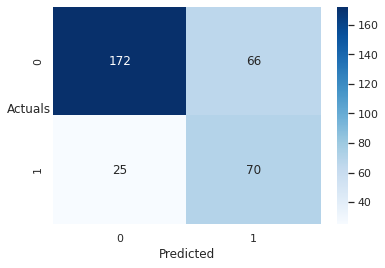

In [315]:
sns.heatmap((metrics.confusion_matrix(laptop_test['Taken_product'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [316]:
print(metrics.classification_report(laptop_test['Taken_product'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       238
           1       0.51      0.74      0.61        95

    accuracy                           0.73       333
   macro avg       0.69      0.73      0.70       333
weighted avg       0.77      0.73      0.74       333



Logistic regression -Smote

In [317]:
from imblearn.over_sampling import SMOTE
# SMOTE is only applied on the train data set

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [318]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 14)

In [319]:
# Logistic Stats Models  With SMOTE¶
from sklearn.linear_model import LogisticRegression

In [320]:
Logit_SM_model=LogisticRegression()

In [321]:
Logit_SM_model.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
## Performance Matrix on train data set
y_train_predict = Logit_SM_model.predict(X_train_res)
model_score = Logit_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.6708754208754208
[[373 221]
 [170 424]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       594
           1       0.66      0.71      0.68       594

    accuracy                           0.67      1188
   macro avg       0.67      0.67      0.67      1188
weighted avg       0.67      0.67      0.67      1188



In [323]:
## Performance Matrix on test data set
y_test_predict = Logit_SM_model.predict(X_test)
model_score = Logit_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6726726726726727
[[148  90]
 [ 19  76]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       238
           1       0.46      0.80      0.58        95

    accuracy                           0.67       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.76      0.67      0.69       333



Logistic Model using stats model-Model C

Approach -2 :We will not check multicollinearity and look for insignificant features ,drops it untill we get all significant features .Build Logistic Regression model C.

In [324]:
import statsmodels.formula.api as SM

In [325]:
laptop_train.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page', 'Taken_product'],
      dtype='object')

In [326]:
# /Model 1¶
# Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [327]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [328]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
8,following_company_page,1.473312
10,working_flag,1.572532
4,preferred_location_type,1.759172
12,Adult_flag,1.786965
2,yearly_avg_Outstation_checkins,2.411795
7,week_since_last_outstation_checkin,2.960317
1,total_likes_on_outstation_checkin_given,5.602525
6,total_likes_on_outofstation_checkin_received,6.710497
11,travelling_network_rating,7.963239
3,member_in_family,8.855997


In [329]:
# Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [330]:
#Creating our first model using all variables
Model_1 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page+montly_avg_comment_on_company_page+Yearly_avg_comment_on_travel_page+Daily_Avg_mins_spend_on_traveling_page+member_in_family+travelling_network_rating	+	total_likes_on_outofstation_checkin_received+total_likes_on_outstation_checkin_given+week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+Adult_flag+preferred_location_type	+working_flag	+following_company_page',data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.410754
         Iterations 7


In [331]:
# Checking the coefficients
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2443
Time:                        20:53:20   Log-Likelihood:                -318.33
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 3.581e-36
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0304      0.820      0.037      0.970      -1.576       1.637
Yearly_avg_view_on_travel_page                  -0.0035      0.002     -1.679      0.093      -0.008       0.001
montly_avg_comment_on_company_page               0.0329      0.019      1.704      0.088      -0.005       0.071
Yearly_avg_comment_on_travel_page                0.0129      0.005      2.570      0.010       0.003       0.023
Daily_Avg_mins_spend_on_traveling_page          -0.0882      0.024     -3.751      0.000      -0.134      -0.042
member_in_family                                 0.0498      0.098      0.507      0.612      -0.143       0.243
travelling_network_rating                       -0.3796      0.100     -3.801      0.000      -0.575      -0.184
total_likes_on_outofstation_checkin_received    -0.0001   4.19e-05     -3.518      0.000      -0.000   -6.53e-05
total_likes_on_outstation_checkin_given      -2.181e-05   7.72e-06     -2.826      0.005   -3.69e-05   -6.69e-06
week_since_last_outstation_checkin               0.2158      0.043      5.038      0.000       0.132       0.300
yearly_avg_Outstation_checkins                   0.0513      0.012      4.218      0.000       0.027       0.075
Adult_flag                                      -0.9650      0.220     -4.381      0.000      -1.397      -0.533
preferred_location_type                         -0.0381      0.024     -1.578      0.115      -0.085       0.009
working_flag                                    -0.2708      0.322     -0.840      0.401      -0.903       0.361
following_company_page                           1.5509      0.211      7.342      0.000       1.137       1.965
================================================================================================================
"""

In [332]:
# Variable member_in_familyhas the highest p-value and is insignificant, therefore, we need to eliminate it.

In [333]:
#Creating our first model using all variables
Model_2 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page+montly_avg_comment_on_company_page+Yearly_avg_comment_on_travel_page+Daily_Avg_mins_spend_on_traveling_page+travelling_network_rating	+	total_likes_on_outofstation_checkin_received+total_likes_on_outstation_checkin_given+week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+Adult_flag+preferred_location_type	+working_flag	+following_company_page',data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.410920
         Iterations 7


In [334]:
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                           13
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2440
Time:                        20:53:21   Log-Likelihood:                -318.46
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 9.923e-37
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1311      0.795      0.165      0.869      -1.427       1.689
Yearly_avg_view_on_travel_page                  -0.0034      0.002     -1.638      0.101      -0.007       0.001
montly_avg_comment_on_company_page               0.0327      0.019      1.696      0.090      -0.005       0.070
Yearly_avg_comment_on_travel_page                0.0129      0.005      2.574      0.010       0.003       0.023
Daily_Avg_mins_spend_on_traveling_page          -0.0882      0.024     -3.754      0.000      -0.134      -0.042
travelling_network_rating                       -0.3766      0.100     -3.780      0.000      -0.572      -0.181
total_likes_on_outofstation_checkin_received    -0.0001   4.16e-05     -3.494      0.000      -0.000   -6.39e-05
total_likes_on_outstation_checkin_given      -2.202e-05   7.71e-06     -2.856      0.004   -3.71e-05   -6.91e-06
week_since_last_outstation_checkin               0.2163      0.043      5.051      0.000       0.132       0.300
yearly_avg_Outstation_checkins                   0.0520      0.012      4.296      0.000       0.028       0.076
Adult_flag                                      -0.9541      0.219     -4.358      0.000      -1.383      -0.525
preferred_location_type                         -0.0388      0.024     -1.609      0.108      -0.086       0.008
working_flag                                    -0.2888      0.321     -0.901      0.368      -0.917       0.339
following_company_page                           1.5574      0.211      7.382      0.000       1.144       1.971
================================================================================================================
"""

In [335]:
# Eliminating working_flag

In [336]:
Model_3 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page+montly_avg_comment_on_company_page+Yearly_avg_comment_on_travel_page+Daily_Avg_mins_spend_on_traveling_page+travelling_network_rating	+	total_likes_on_outofstation_checkin_received+total_likes_on_outstation_checkin_given+week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+Adult_flag+preferred_location_type	+following_company_page',data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.411452
         Iterations 7


In [337]:
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                           12
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2430
Time:                        20:53:22   Log-Likelihood:                -318.88
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 3.460e-37
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.2409      0.787      0.306      0.759      -1.301       1.783
Yearly_avg_view_on_travel_page                  -0.0035      0.002     -1.711      0.087      -0.008       0.001
montly_avg_comment_on_company_page               0.0248      0.017      1.439      0.150      -0.009       0.059
Yearly_avg_comment_on_travel_page                0.0134      0.005      2.688      0.007       0.004       0.023
Daily_Avg_mins_spend_on_traveling_page          -0.0868      0.023     -3.700      0.000      -0.133      -0.041
travelling_network_rating                       -0.3672      0.099     -3.708      0.000      -0.561      -0.173
total_likes_on_outofstation_checkin_received    -0.0001   4.16e-05     -3.511      0.000      -0.000   -6.45e-05
total_likes_on_outstation_checkin_given      -2.212e-05   7.69e-06     -2.878      0.004   -3.72e-05   -7.06e-06
week_since_last_outstation_checkin               0.2207      0.043      5.180      0.000       0.137       0.304
yearly_avg_Outstation_checkins                   0.0515      0.012      4.271      0.000       0.028       0.075
Adult_flag                                      -0.9359      0.218     -4.300      0.000      -1.362      -0.509
preferred_location_type                         -0.0382      0.024     -1.587      0.112      -0.085       0.009
following_company_page                           1.5635      0.211      7.419      0.000       1.150       1.977
================================================================================================================
"""

In [338]:
# Eliminating montly_avg_comment_on_company_page

In [339]:
Model_4 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page+Yearly_avg_comment_on_travel_page+Daily_Avg_mins_spend_on_traveling_page+travelling_network_rating	+	total_likes_on_outofstation_checkin_received+total_likes_on_outstation_checkin_given+week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+Adult_flag+preferred_location_type	+following_company_page',data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.412787
         Iterations 7


In [340]:
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2405
Time:                        20:53:23   Log-Likelihood:                -319.91
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 2.098e-37
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.8756      0.653      1.340      0.180      -0.405       2.156
Yearly_avg_view_on_travel_page                  -0.0039      0.002     -1.912      0.056      -0.008    9.81e-05
Yearly_avg_comment_on_travel_page                0.0138      0.005      2.779      0.005       0.004       0.024
Daily_Avg_mins_spend_on_traveling_page          -0.0773      0.022     -3.462      0.001      -0.121      -0.034
travelling_network_rating                       -0.3690      0.099     -3.737      0.000      -0.563      -0.175
total_likes_on_outofstation_checkin_received    -0.0002    4.1e-05     -3.770      0.000      -0.000   -7.42e-05
total_likes_on_outstation_checkin_given      -2.154e-05   7.68e-06     -2.806      0.005   -3.66e-05   -6.49e-06
week_since_last_outstation_checkin               0.2221      0.042      5.242      0.000       0.139       0.305
yearly_avg_Outstation_checkins                   0.0514      0.012      4.284      0.000       0.028       0.075
Adult_flag                                      -0.9193      0.217     -4.233      0.000      -1.345      -0.494
preferred_location_type                         -0.0368      0.024     -1.530      0.126      -0.084       0.010
following_company_page                           1.5509      0.210      7.386      0.000       1.139       1.962
================================================================================================================
"""

In [341]:
# Eliminating preferred_location_type

In [342]:
Model_5 = SM.logit(formula = 'Taken_product ~ Yearly_avg_view_on_travel_page+Yearly_avg_comment_on_travel_page+Daily_Avg_mins_spend_on_traveling_page+travelling_network_rating	+	total_likes_on_outofstation_checkin_received+total_likes_on_outstation_checkin_given+week_since_last_outstation_checkin+yearly_avg_Outstation_checkins+Adult_flag+following_company_page',data=laptop_train).fit()

Optimization terminated successfully.
         Current function value: 0.414328
         Iterations 7


In [343]:
Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Taken_product   No. Observations:                  775
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2377
Time:                        20:53:24   Log-Likelihood:                -321.10
converged:                       True   LL-Null:                       -421.23
Covariance Type:            nonrobust   LLR p-value:                 1.424e-37
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.6918      0.641      1.079      0.281      -0.565       1.948
Yearly_avg_view_on_travel_page                  -0.0040      0.002     -1.972      0.049      -0.008   -2.54e-05
Yearly_avg_comment_on_travel_page                0.0141      0.005      2.825      0.005       0.004       0.024
Daily_Avg_mins_spend_on_traveling_page          -0.0786      0.022     -3.538      0.000      -0.122      -0.035
travelling_network_rating                       -0.3579      0.098     -3.640      0.000      -0.551      -0.165
total_likes_on_outofstation_checkin_received    -0.0001   4.05e-05     -3.604      0.000      -0.000   -6.66e-05
total_likes_on_outstation_checkin_given      -2.139e-05   7.63e-06     -2.805      0.005   -3.63e-05   -6.44e-06
week_since_last_outstation_checkin               0.2217      0.042      5.246      0.000       0.139       0.305
yearly_avg_Outstation_checkins                   0.0511      0.012      4.284      0.000       0.028       0.074
Adult_flag                                      -0.9101      0.216     -4.204      0.000      -1.334      -0.486
following_company_page                           1.5455      0.209      7.402      0.000       1.136       1.955
================================================================================================================
"""

In [344]:
# Now all the variables are significant, therefore, we don't need to eliminate any variable.
# We can see that all variables are significant & may be useful to discriminate cases of deault

In [345]:
print('The adjusted pseudo R-square value is',1 - ((Model_5.llf - Model_5.df_model)/Model_5.llnull))

The adjusted pseudo R-square value is 0.2139667774512657


In [346]:
# Adjusted pseudo R-square seems to be very close to Pseudo R-square value which means there are no insignificant variables present in the model. 

In [347]:
# We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

# We also notice that current model has no insignificant variables and can be used for prediction purposes.

# Lets test the prediction of this model on train and test dataset

In [348]:
# Prediction on the Data
# Let us first check the distribution plot of the logit function values

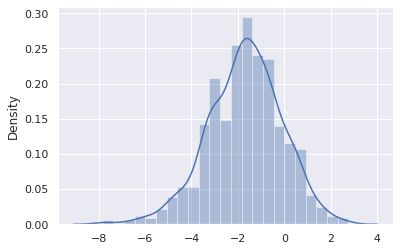

In [349]:
sns.distplot(Model_5.fittedvalues);

In [350]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',775+333)

X_train (775, 14)
X_test (333, 14)
y_train (775,)
y_test (333,)
Total Obs 1108


In [351]:
# Now, let us see the predicted probability values:

In [352]:
# Prediction on Train set¶
y_predict_train = Model_5.predict(X_train)
y_predict_train

667     0.003289
737     0.038936
820     0.654281
385     0.665328
785     0.384131
          ...   
715     0.132855
905     0.616933
1096    0.086599
235     0.376779
1061    0.333063
Length: 775, dtype: float64

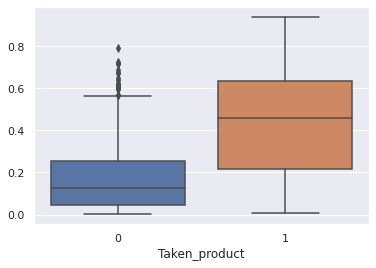

In [353]:
sns.boxplot(x=laptop_train['Taken_product'],y=y_predict_train)
plt.xlabel('Taken_product');

In [360]:
# From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model.
#  Let us take a cut-off of 0.062 and check.
# Let us now see the predicted classes

In [361]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.062:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [362]:
from sklearn import metrics

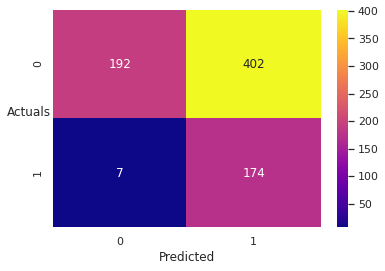

In [363]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [364]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 192 
False Positives: 402 
False Negatives: 7 
True Positives: 174


In [365]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.32      0.48       594
           1       0.30      0.96      0.46       181

    accuracy                           0.47       775
   macro avg       0.63      0.64      0.47       775
weighted avg       0.81      0.47      0.48       775



In [366]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

304     0.074696
1072    0.159334
126     0.129384
976     0.045288
236     0.255169
          ...   
691     0.008815
954     0.269118
1087    0.115067
775     0.823376
836     0.115495
Length: 333, dtype: float64

In [367]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.062:
        a=1
    else:
        a=0
    y_class_pred.append(a)

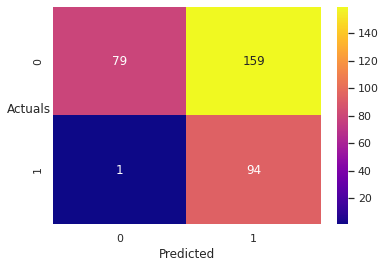

In [368]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [369]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 79 
False Positives: 159 
False Negatives: 1 
True Positives: 94


In [370]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.99      0.33      0.50       238
           1       0.37      0.99      0.54        95

    accuracy                           0.52       333
   macro avg       0.68      0.66      0.52       333
weighted avg       0.81      0.52      0.51       333



In [371]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

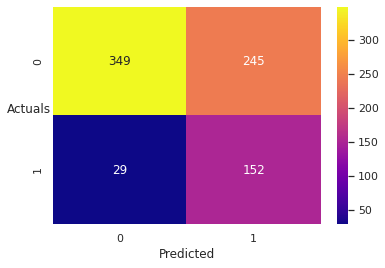

In [372]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [373]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)


True Negative: 349 
False Positives: 245 
False Negatives: 29 
True Positives: 152


In [374]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       594
           1       0.38      0.84      0.53       181

    accuracy                           0.65       775
   macro avg       0.65      0.71      0.62       775
weighted avg       0.80      0.65      0.67       775



In [375]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

304     0.074696
1072    0.159334
126     0.129384
976     0.045288
236     0.255169
          ...   
691     0.008815
954     0.269118
1087    0.115067
775     0.823376
836     0.115495
Length: 333, dtype: float64

In [376]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

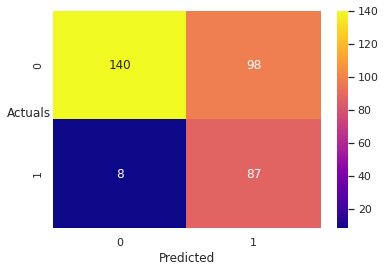

In [377]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [378]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 140 
False Positives: 98 
False Negatives: 8 
True Positives: 87


In [379]:
print(metrics.classification_report(y_test,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       238
           1       0.47      0.92      0.62        95

    accuracy                           0.68       333
   macro avg       0.71      0.75      0.67       333
weighted avg       0.81      0.68      0.70       333



In [380]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

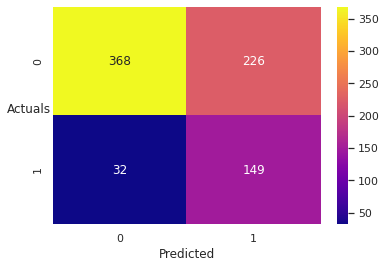

In [381]:

# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [382]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 368 
False Positives: 226 
False Negatives: 32 
True Positives: 149


In [383]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74       594
           1       0.40      0.82      0.54       181

    accuracy                           0.67       775
   macro avg       0.66      0.72      0.64       775
weighted avg       0.80      0.67      0.69       775



In [384]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

304     0.074696
1072    0.159334
126     0.129384
976     0.045288
236     0.255169
          ...   
691     0.008815
954     0.269118
1087    0.115067
775     0.823376
836     0.115495
Length: 333, dtype: float64

In [385]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

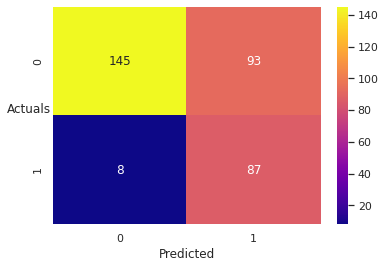

In [386]:
# Checking the accuracy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [387]:

tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 145 
False Positives: 93 
False Negatives: 8 
True Positives: 87


In [388]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74       238
           1       0.48      0.92      0.63        95

    accuracy                           0.70       333
   macro avg       0.72      0.76      0.69       333
weighted avg       0.82      0.70      0.71       333



In [389]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

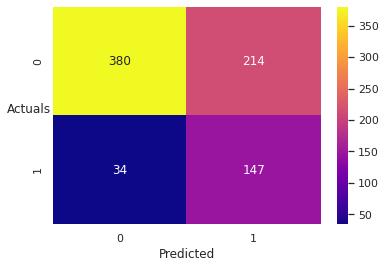

In [390]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [391]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 380 
False Positives: 214 
False Negatives: 34 
True Positives: 147


In [392]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75       594
           1       0.41      0.81      0.54       181

    accuracy                           0.68       775
   macro avg       0.66      0.73      0.65       775
weighted avg       0.80      0.68      0.70       775



In [393]:
# Prediction on Test set
y_predict_test = Model_5.predict(X_test)
y_predict_test

304     0.074696
1072    0.159334
126     0.129384
976     0.045288
236     0.255169
          ...   
691     0.008815
954     0.269118
1087    0.115067
775     0.823376
836     0.115495
Length: 333, dtype: float64

In [394]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

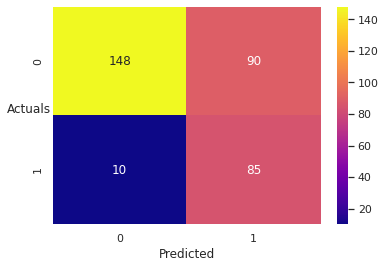

In [395]:
# Checking the accuracy of the model using confusion matrix for test set¶
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [396]:

tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 148 
False Positives: 90 
False Negatives: 10 
True Positives: 85


In [397]:

# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75       238
           1       0.49      0.89      0.63        95

    accuracy                           0.70       333
   macro avg       0.71      0.76      0.69       333
weighted avg       0.81      0.70      0.71       333



In [398]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

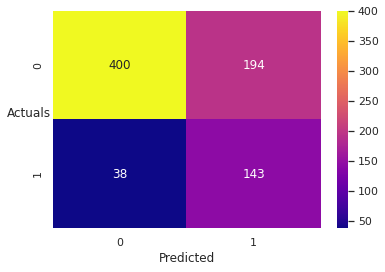

In [399]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [400]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 400 
False Positives: 194 
False Negatives: 38 
True Positives: 143


In [401]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.67      0.78       594
           1       0.42      0.79      0.55       181

    accuracy                           0.70       775
   macro avg       0.67      0.73      0.66       775
weighted avg       0.80      0.70      0.72       775



In [402]:
# Prediction on Test set¶
y_predict_test = Model_5.predict(X_test)
y_predict_test

304     0.074696
1072    0.159334
126     0.129384
976     0.045288
236     0.255169
          ...   
691     0.008815
954     0.269118
1087    0.115067
775     0.823376
836     0.115495
Length: 333, dtype: float64

In [403]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

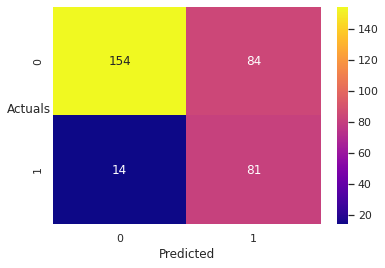

In [404]:
# Checking the accurcy of the model using confusion matrix for test set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [405]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 154 
False Positives: 84 
False Negatives: 14 
True Positives: 81


In [406]:
# Let us now go ahead and print the classification report to check the various other parameters

print(metrics.classification_report(y_test,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       238
           1       0.49      0.85      0.62        95

    accuracy                           0.71       333
   macro avg       0.70      0.75      0.69       333
weighted avg       0.80      0.71      0.72       333



In [407]:

y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

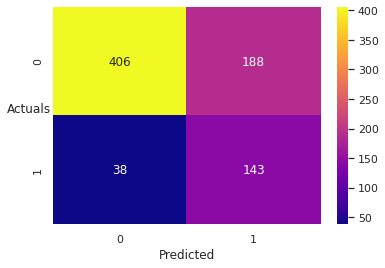

In [408]:
# Checking the accuracy of the model using confusion matrix for training set
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [409]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 406 
False Positives: 188 
False Negatives: 38 
True Positives: 143


In [410]:
print(metrics.classification_report(y_train,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       594
           1       0.43      0.79      0.56       181

    accuracy                           0.71       775
   macro avg       0.67      0.74      0.67       775
weighted avg       0.80      0.71      0.73       775

